In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import random
random.seed(42)
np.random.seed(42)

In [2]:
gistic = pd.read_csv('gisticBoth.csv', delimiter = '\t', index_col=0)
gisticLabel = pd.read_csv('gisticBothLabel.csv', delimiter = '\t', index_col=0)
print('gistic counts', gisticLabel['label'].value_counts())

gistic counts label
0    548
1    297
Name: count, dtype: int64


In [3]:
htseq = pd.read_csv('htseqBoth.csv', delimiter = '\t', index_col=0)
htseq = htseq.add_prefix('htseq_')
label = pd.read_csv('htseqBothLabel.csv', delimiter = '\t', index_col=0)
print('htseq counts', label['label'].value_counts())

htseq counts label
0    583
1    309
Name: count, dtype: int64


In [4]:
mirna = pd.read_csv('mirnaBoth.csv', delimiter = '\t', index_col=0)
mirnaLabel = pd.read_csv('mirnaBothLabel.csv', delimiter = '\t', index_col=0)
print('mirna counts', mirnaLabel['label'].value_counts())

mirna counts label
0    575
1    312
Name: count, dtype: int64


In [5]:
gisticLabel['label'].value_counts()

label
0    548
1    297
Name: count, dtype: int64

In [6]:
label['label'].value_counts()

label
0    583
1    309
Name: count, dtype: int64

In [7]:
mirnaLabel['label'].value_counts()

label
0    575
1    312
Name: count, dtype: int64

In [8]:
overlap = list(set(gistic.index) & set(htseq.index) & set(mirna.index))
overlap

['TCGA-BS-A0TD-01A',
 'TCGA-D1-A17S-01A',
 'TCGA-A5-A3LO-01A',
 'TCGA-C5-A2LZ-01A',
 'TCGA-AX-A2H2-01A',
 'TCGA-BK-A0C9-01A',
 'TCGA-EY-A3L3-01A',
 'TCGA-ZJ-A8QO-01A',
 'TCGA-EO-A1Y8-01A',
 'TCGA-VS-A8QC-01A',
 'TCGA-AP-A0LH-01A',
 'TCGA-EY-A1GR-01A',
 'TCGA-D1-A1NS-01A',
 'TCGA-D1-A175-01A',
 'TCGA-VS-A94Z-01A',
 'TCGA-BK-A13C-01A',
 'TCGA-DF-A2KR-01A',
 'TCGA-UC-A7PG-06A',
 'TCGA-EO-A22R-01A',
 'TCGA-JW-A5VH-01A',
 'TCGA-D1-A1NU-01A',
 'TCGA-EO-A3AS-01A',
 'TCGA-PG-A917-01A',
 'TCGA-BG-A0VT-01A',
 'TCGA-EK-A2RE-01A',
 'TCGA-D1-A16S-01A',
 'TCGA-D1-A160-01A',
 'TCGA-AX-A1CF-01A',
 'TCGA-EA-A78R-01A',
 'TCGA-AJ-A3NC-01A',
 'TCGA-SL-A6J9-01A',
 'TCGA-C5-A1MH-01A',
 'TCGA-ZX-AA5X-01A',
 'TCGA-C5-A1M9-01A',
 'TCGA-C5-A3HL-01A',
 'TCGA-MA-AA3X-01A',
 'TCGA-EY-A2ON-01A',
 'TCGA-HM-A3JJ-01A',
 'TCGA-BG-A3PP-01A',
 'TCGA-EA-A6QX-01A',
 'TCGA-VS-A9UQ-01A',
 'TCGA-D1-A179-01A',
 'TCGA-EY-A3QX-01A',
 'TCGA-AX-A1C7-01A',
 'TCGA-AP-A0LI-01A',
 'TCGA-DG-A2KM-01A',
 'TCGA-EY-A1GO-01A',
 'TCGA-MU-A8J

In [9]:
len(overlap)

824

In [10]:
allEm = pd.concat([gistic, mirna, htseq], axis=1)

In [11]:
allEm

ENSG00000008128.21  ENSG00000008130.14  ENSG00000067606.14  \
TCGA-DS-A0VK-01A                 0.0                 0.0                 0.0   
TCGA-DS-A0VM-01A                 0.0                 0.0                 0.0   
TCGA-DS-A0VN-01A                 1.0                 1.0                 1.0   
TCGA-DS-A0VL-01A                 0.0                 0.0                 0.0   
TCGA-BI-A0VR-01A                 0.0                 0.0                 0.0   
...                              ...                 ...                 ...   
TCGA-AX-A2HC-11A                 NaN                 NaN                 NaN   
TCGA-FL-A1YF-11A                 NaN                 NaN                 NaN   
TCGA-A5-A0VO-01A                 NaN                 NaN                 NaN   
TCGA-BK-A13C-11A                 NaN                 NaN                 NaN   
TCGA-FL-A1YV-11A                 NaN                 NaN                 NaN   

                  ENSG00000078369.16  ENSG00000078808.15  ENSG00000107404.16  \
TCGA-DS-A0VK-01A                 0.0                 0.0                 0.0   
TCGA-DS-A0VM-01A                 0.0                 0.0                 0.0   
TCGA-DS-A0VN-01A                 1.0                 1.0                 1.0   
TCGA-DS-A0VL-01A                 0.0                 0.0                 0.0   
TCGA-BI-A0VR-01A                 0.0                 0.0                 0.0   
...                              ...                 ...                 ...   
TCGA-AX-A2HC-11A                 NaN                 NaN                 NaN   
TCGA-FL-A1YF-11A                 NaN                 NaN                 NaN   
TCGA-A5-A0VO-01A                 NaN                 NaN                 NaN   
TCGA-BK-A13C-11A                 NaN                 NaN                 NaN   
TCGA-FL-A1YV-11A                 NaN                 NaN                 NaN   

                  ENSG00000116151.12  ENSG00000127054.17  ENSG00000131584.17  \
TCGA-DS-A0VK-01A                 0.0                 0.0                 0.0   
TCGA-DS-A0VM-01A                 0.0                 0.0                 0.0   
TCGA-DS-A0VN-01A                 1.0                 1.0                 1.0   
TCGA-DS-A0VL-01A                 0.0                 0.0                 0.0   
TCGA-BI-A0VR-01A                 0.0                 0.0                 0.0   
...                              ...                 ...                 ...   
TCGA-AX-A2HC-11A                 NaN                 NaN                 NaN   
TCGA-FL-A1YF-11A                 NaN                 NaN                 NaN   
TCGA-A5-A0VO-01A                 NaN                 NaN                 NaN   
TCGA-BK-A13C-11A                 NaN                 NaN                 NaN   
TCGA-FL-A1YV-11A                 NaN                 NaN                 NaN   

                  ENSG00000131591.16  ...  htseq_ENSG00000238244.3  \
TCGA-DS-A0VK-01A                 0.0  ...                      0.0   
TCGA-DS-A0VM-01A                 0.0  ...                      0.0   
TCGA-DS-A0VN-01A                 1.0  ...                      0.0   
TCGA-DS-A0VL-01A                 0.0  ...                      0.0   
TCGA-BI-A0VR-01A                 0.0  ...                      0.0   
...                              ...  ...                      ...   
TCGA-AX-A2HC-11A                 NaN  ...                      0.0   
TCGA-FL-A1YF-11A                 NaN  ...                      0.0   
TCGA-A5-A0VO-01A                 NaN  ...                      0.0   
TCGA-BK-A13C-11A                 NaN  ...                      0.0   
TCGA-FL-A1YV-11A                 NaN  ...                      0.0   

                  htseq_ENSG00000186115.11  htseq_ENSG00000216352.1  \
TCGA-DS-A0VK-01A                 11.911893                      0.0   
TCGA-DS-A0VM-01A                  0.000000                      0.0   
TCGA-DS-A0VN-01A                 12.314008                      0.0   
TCGA-DS-A0

In [12]:
newAll = allEm.loc[overlap]

In [13]:
# newAll = newAll.loc[:,~newAll.columns.duplicated()].copy()
# newAll['ENSG00000008128.21']

In [14]:
newAll['label'] = label

In [15]:
print('all counts', newAll['label'].value_counts())

all counts label
0    530
1    294
Name: count, dtype: int64


In [16]:
newAllLabel = newAll['label']
newAll = newAll.drop(columns=['label'])

In [17]:
newAll

ENSG00000008128.21  ENSG00000008130.14  ENSG00000067606.14  \
TCGA-BS-A0TD-01A                 0.0                 0.0                 0.0   
TCGA-D1-A17S-01A                 0.0                 0.0                 0.0   
TCGA-A5-A3LO-01A                 0.0                 0.0                 0.0   
TCGA-C5-A2LZ-01A                 0.0                 0.0                 0.0   
TCGA-AX-A2H2-01A                 0.0                 0.0                 0.0   
...                              ...                 ...                 ...   
TCGA-FU-A3NI-01A                -1.0                -1.0                -1.0   
TCGA-AX-A064-01A                 0.0                 0.0                 0.0   
TCGA-AX-A05U-01A                 0.0                 0.0                 0.0   
TCGA-D1-A0ZZ-01A                 0.0                 0.0                 0.0   
TCGA-DG-A2KH-01A                 0.0                 0.0                 0.0   

                  ENSG00000078369.16  ENSG00000078808.15  ENSG00000107404.16  \
TCGA-BS-A0TD-01A                 0.0                 0.0                 0.0   
TCGA-D1-A17S-01A                 0.0                 0.0                 0.0   
TCGA-A5-A3LO-01A                 0.0                 0.0                 0.0   
TCGA-C5-A2LZ-01A                 0.0                 0.0                 0.0   
TCGA-AX-A2H2-01A                 0.0                 0.0                 0.0   
...                              ...                 ...                 ...   
TCGA-FU-A3NI-01A                -1.0                -1.0                -1.0   
TCGA-AX-A064-01A                 0.0                 0.0                 0.0   
TCGA-AX-A05U-01A                 0.0                 0.0                 0.0   
TCGA-D1-A0ZZ-01A                 0.0                 0.0                 0.0   
TCGA-DG-A2KH-01A                 0.0                 0.0                 0.0   

                  ENSG00000116151.12  ENSG00000127054.17  ENSG00000131584.17  \
TCGA-BS-A0TD-01A                 0.0                 0.0                 0.0   
TCGA-D1-A17S-01A                 0.0                 0.0                 0.0   
TCGA-A5-A3LO-01A                 0.0                 0.0                 0.0   
TCGA-C5-A2LZ-01A                 0.0                 0.0                 0.0   
TCGA-AX-A2H2-01A                 0.0                 0.0                 0.0   
...                              ...                 ...                 ...   
TCGA-FU-A3NI-01A                -1.0                -1.0                -1.0   
TCGA-AX-A064-01A                 0.0                 0.0                 0.0   
TCGA-AX-A05U-01A                 0.0                 0.0                 0.0   
TCGA-D1-A0ZZ-01A                 0.0                 0.0                 0.0   
TCGA-DG-A2KH-01A                 0.0                 0.0                 0.0   

                  ENSG00000131591.16  ...  htseq_ENSG00000238244.3  \
TCGA-BS-A0TD-01A                 0.0  ...                      0.0   
TCGA-D1-A17S-01A                 0.0  ...                      0.0   
TCGA-A5-A3LO-01A                 0.0  ...                      0.0   
TCGA-C5-A2LZ-01A                 0.0  ...                      0.0   
TCGA-AX-A2H2-01A                 0.0  ...                      0.0   
...                              ...  ...                      ...   
TCGA-FU-A3NI-01A                -1.0  ...                      0.0   
TCGA-AX-A064-01A                 0.0  ...                      0.0   
TCGA-AX-A05U-01A                 0.0  ...                      0.0   
TCGA-D1-A0ZZ-01A                 0.0  ...                      0.0   
TCGA-DG-A2KH-01A                 0.0  ...                      0.0   

                  htseq_ENSG00000186115.11  htseq_ENSG00000216352.1  \
TCGA-BS-A0TD-01A                  1.584963                      0.0   
TCGA-D1-A17S-01A                  1.000000                      0.0   
TCGA-A5-A3LO-01A                  0.000000                      0.0   
TCGA-C5-A2

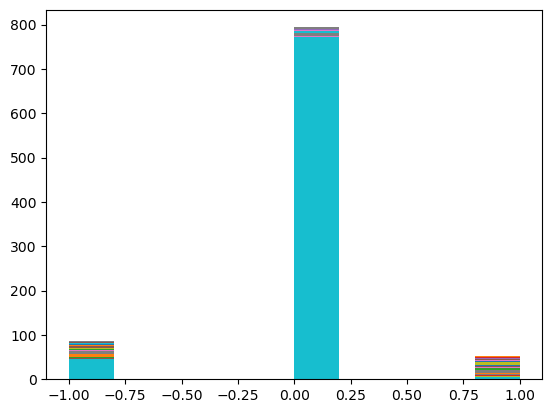

In [18]:
for i in range(1000):
    plt.hist(newAll.iloc[:, [i]])

In [19]:
# standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
newAll = pd.DataFrame(scaler.fit_transform(newAll.values), columns=newAll.columns, index=newAll.index)
newAll

ENSG00000008128.21  ENSG00000008130.14  ENSG00000067606.14  \
TCGA-BS-A0TD-01A            0.155114            0.155114            0.155114   
TCGA-D1-A17S-01A            0.155114            0.155114            0.155114   
TCGA-A5-A3LO-01A            0.155114            0.155114            0.155114   
TCGA-C5-A2LZ-01A            0.155114            0.155114            0.155114   
TCGA-AX-A2H2-01A            0.155114            0.155114            0.155114   
...                              ...                 ...                 ...   
TCGA-FU-A3NI-01A           -2.749754           -2.749754           -2.749754   
TCGA-AX-A064-01A            0.155114            0.155114            0.155114   
TCGA-AX-A05U-01A            0.155114            0.155114            0.155114   
TCGA-D1-A0ZZ-01A            0.155114            0.155114            0.155114   
TCGA-DG-A2KH-01A            0.155114            0.155114            0.155114   

                  ENSG00000078369.16  ENSG00000078808.15  ENSG00000107404.16  \
TCGA-BS-A0TD-01A            0.155114            0.155114            0.155114   
TCGA-D1-A17S-01A            0.155114            0.155114            0.155114   
TCGA-A5-A3LO-01A            0.155114            0.155114            0.155114   
TCGA-C5-A2LZ-01A            0.155114            0.155114            0.155114   
TCGA-AX-A2H2-01A            0.155114            0.155114            0.155114   
...                              ...                 ...                 ...   
TCGA-FU-A3NI-01A           -2.749754           -2.749754           -2.749754   
TCGA-AX-A064-01A            0.155114            0.155114            0.155114   
TCGA-AX-A05U-01A            0.155114            0.155114            0.155114   
TCGA-D1-A0ZZ-01A            0.155114            0.155114            0.155114   
TCGA-DG-A2KH-01A            0.155114            0.155114            0.155114   

                  ENSG00000116151.12  ENSG00000127054.17  ENSG00000131584.17  \
TCGA-BS-A0TD-01A            0.155114            0.155114            0.155114   
TCGA-D1-A17S-01A            0.155114            0.155114            0.155114   
TCGA-A5-A3LO-01A            0.155114            0.155114            0.155114   
TCGA-C5-A2LZ-01A            0.155114            0.155114            0.155114   
TCGA-AX-A2H2-01A            0.155114            0.155114            0.155114   
...                              ...                 ...                 ...   
TCGA-FU-A3NI-01A           -2.749754           -2.749754           -2.749754   
TCGA-AX-A064-01A            0.155114            0.155114            0.155114   
TCGA-AX-A05U-01A            0.155114            0.155114            0.155114   
TCGA-D1-A0ZZ-01A            0.155114            0.155114            0.155114   
TCGA-DG-A2KH-01A            0.155114            0.155114            0.155114   

                  ENSG00000131591.16  ...  htseq_ENSG00000238244.3  \
TCGA-BS-A0TD-01A            0.155114  ...                      0.0   
TCGA-D1-A17S-01A            0.155114  ...                      0.0   
TCGA-A5-A3LO-01A            0.155114  ...                      0.0   
TCGA-C5-A2LZ-01A            0.155114  ...                      0.0   
TCGA-AX-A2H2-01A            0.155114  ...                      0.0   
...                              ...  ...                      ...   
TCGA-FU-A3NI-01A           -2.749754  ...                      0.0   
TCGA-AX-A064-01A            0.155114  ...                      0.0   
TCGA-AX-A05U-01A            0.155114  ...                      0.0   
TCGA-D1-A0ZZ-01A            0.155114  ...                      0.0   
TCGA-DG-A2KH-01A            0.155114  ...                      0.0   

                  htseq_ENSG00000186115.11  htseq_ENSG00000216352.1  \
TCGA-BS-A0TD-01A                 -0.493688                -0.133797   
TCGA-D1-A17S-01A                 -0.625767                -0.133797   
TCGA-A5-A3LO-01A                 -0.851559                -0.133797   
TCGA-C5-A2

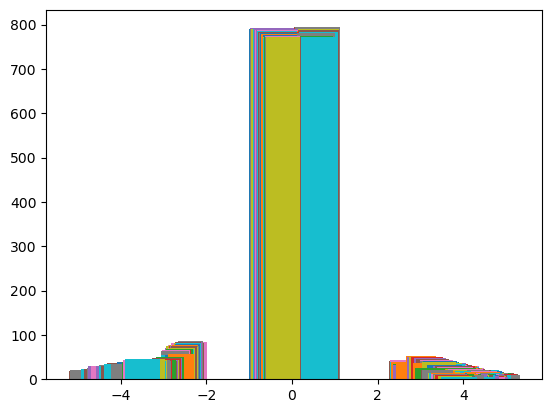

In [20]:
for i in range(1000):
    plt.hist(newAll.iloc[:, [i]])

In [21]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(newAll, newAllLabel, test_size=0.2, stratify=newAllLabel, random_state=42)

In [22]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.005)
lasso_reg.fit(X_train, y_train)
lassoData = pd.DataFrame(lasso_reg.coef_)
    
criteria = lassoData[lassoData[0] > 0]
# print(criteria)
# criteria = criteria[0].nlargest(n=10)

newAll = newAll.iloc[:, criteria.index]
newAll

C:\Users\genaf\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.354e-02, tolerance: 1.512e-02
  model = cd_fast.enet_coordinate_descent(


htseq_ENSG00000281780.1  htseq_ENSG00000275263.1  \
TCGA-BS-A0TD-01A                -0.540061                -0.980349   
TCGA-D1-A17S-01A                -0.591840                -0.787319   
TCGA-A5-A3LO-01A                -0.540061                -0.532148   
TCGA-C5-A2LZ-01A                 1.332584                 1.159048   
TCGA-AX-A2H2-01A                -0.752680                -0.631476   
...                                   ...                      ...   
TCGA-FU-A3NI-01A                 1.195356                 0.881536   
TCGA-AX-A064-01A                -0.913520                -1.173378   
TCGA-AX-A05U-01A                -0.752680                -0.867434   
TCGA-D1-A0ZZ-01A                -0.752680                -0.980349   
TCGA-DG-A2KH-01A                 1.410508                 1.252553   

                  htseq_ENSG00000206630.1  htseq_ENSG00000270788.1  \
TCGA-BS-A0TD-01A                -0.549502                -0.638728   
TCGA-D1-A17S-01A                -0.258199                -0.775768   
TCGA-A5-A3LO-01A                -0.794260                -0.541497   
TCGA-C5-A2LZ-01A                 1.434218                 1.643795   
TCGA-AX-A2H2-01A                -0.616675                -0.775768   
...                                   ...                      ...   
TCGA-FU-A3NI-01A                 1.239993                 1.586285   
TCGA-AX-A064-01A                -0.598054                -1.010039   
TCGA-AX-A05U-01A                -0.838373                -0.775768   
TCGA-D1-A0ZZ-01A                -0.647605                -0.775768   
TCGA-DG-A2KH-01A                 1.154020                 1.568193   

                  htseq_ENSG00000230929.5  htseq_ENSG00000269019.1  \
TCGA-BS-A0TD-01A                -0.646780                -0.763449   
TCGA-D1-A17S-01A                -1.038421                -0.640787   
TCGA-A5-A3LO-01A                -0.728053                -0.518124   
TCGA-C5-A2LZ-01A                 1.466517                 1.027135   
TCGA-AX-A2H2-01A                -0.646780                -0.850480   
...                                   ...                      ...   
TCGA-FU-A3NI-01A                 1.461975                 1.436742   
TCGA-AX-A064-01A                -0.646780                -0.640787   
TCGA-AX-A05U-01A                -0.728053                -0.763449   
TCGA-D1-A0ZZ-01A                -0.417686                -1.182835   
TCGA-DG-A2KH-01A                 1.828182                 0.750048   

                  htseq_ENSG00000243753.4  htseq_ENSG00000215030.5  \
TCGA-BS-A0TD-01A                -0.340066                -0.344633   
TCGA-D1-A17S-01A                -1.052480                -0.143208   
TCGA-A5-A3LO-01A                -0.035722                -0.986647   
TCGA-C5-A2LZ-01A                 1.041096                 1.155532   
TCGA-AX-A2H2-01A                -0.207991                -0.734303   
...                                   ...                      ...   
TCGA-FU-A3NI-01A                 0.820944                 1.268872   
TCGA-AX-A064-01A                -1.824584                -0.837149   
TCGA-AX-A05U-01A                -1.824584                -0.908723   
TCGA-D1-A0ZZ-01A                -1.434627                -1.050246   
TCGA-DG-A2KH-01A                 1.126276                 1.606662   

                  htseq_ENSG00000263432.2  htseq_ENSG00000130748.6  ...  \
TCGA-BS-A0TD-01A                -0.564912                -0.514635  ...   
TCGA-D1-A17S-01A                -0.906552                -0.675042  ...   
TCGA-A5-A3LO-01A                -0.353400                -0.762779  ...   
TCGA-C5-A2LZ-01A                 1.341583                 1.026513  ...   
TCGA-AX-A2H2-01A                -0.906552                -0.717145  ...   
...                                   ...                      ...  ...   
TCGA-FU-A3NI-01A                 1.514961                 0.997188  ...   
TCGA-AX-A064-01A                -1.264873             

In [23]:
numCol = newAll.shape[1]
numCol

152

In [32]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(newAll, newAllLabel, test_size=0.2, stratify=newAllLabel, random_state=42)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import NearestCentroid

LR: 1.000000 (0.000000)


  0%|          | 0/165 [00:00<?, ?it/s]

Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 82 iterations, alpha=2.779e-04, previous alpha=2.779e-04, with an active set of 33 regressors.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=5.764e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 37 iterations, alpha=1.066e-02, previous alpha=1.057e-02, with an active set of 22 regressors.
Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=7.687e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer 

Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 56 iterations, alpha=7.797e-04, previous alpha=5.465e-04, with an active set of 35 regressors.
Linear regression equation is singular, Moore-Penrose pseudoinverse is used instead of the regular inverse.
To use regular inverse do one of the following:
1) turn up the number of samples,
2) turn up the L1 regularization with num_features(N) where N is less than the number of samples,
3) group features together to reduce the number of inputs that need to be explained.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 36 iterations, alpha=2.119e-03, previous alpha=2.098e-03, with an active set of 23 regressors.
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=7.926e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce ma

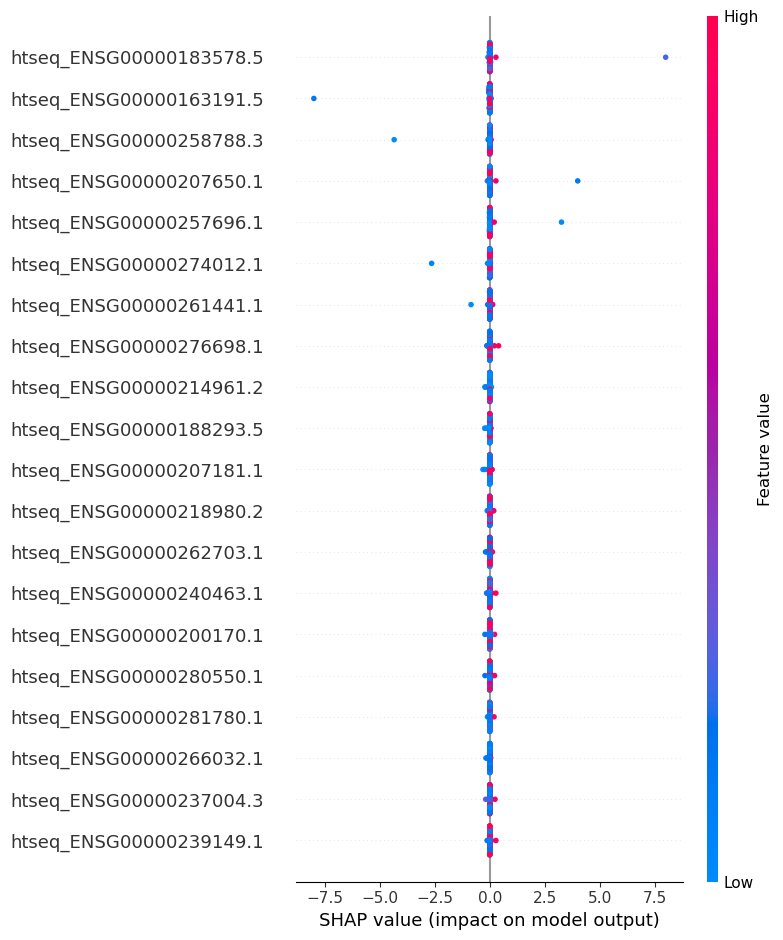

                     col_name  feature_importance_vals
40    htseq_ENSG00000183578.5                 0.051681
128   htseq_ENSG00000163191.5                 0.051350
149   htseq_ENSG00000258788.3                 0.028892
134   htseq_ENSG00000207650.1                 0.028202
135   htseq_ENSG00000257696.1                 0.022789
..                        ...                      ...
31    htseq_ENSG00000250900.5                 0.000781
24    htseq_ENSG00000256540.1                 0.000694
72   htseq_ENSG00000132698.12                 0.000643
51    htseq_ENSG00000268543.1                 0.000635
101   htseq_ENSG00000274569.1                 0.000635

[152 rows x 2 columns]
sum shap 0.6858919004672809
sum shap 1.0000000000000004
[0.07534816195267867, 0.07486645177677574, 0.04212304196047421, 0.041117725038735974, 0.033225536559597126, 0.026620502137830192, 0.013354296378524276, 0.013098331517444089, 0.009880115190965858, 0.00958849448083639, 0.009457075339779523, 0.008778213249558093,

  0%|          | 0/165 [00:00<?, ?it/s]

Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 45 iterations, alpha=6.130e-04, previous alpha=5.921e-04, with an active set of 28 regressors.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=9.909e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 76 iterations, alpha=1.989e-02, previous alpha=1.989e-02, with an active set of 35 regressors.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 49 iterations, alpha=7.048e-04, previous alpha=6.993e-04, with an active set of 28 regressors.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 62 iterat

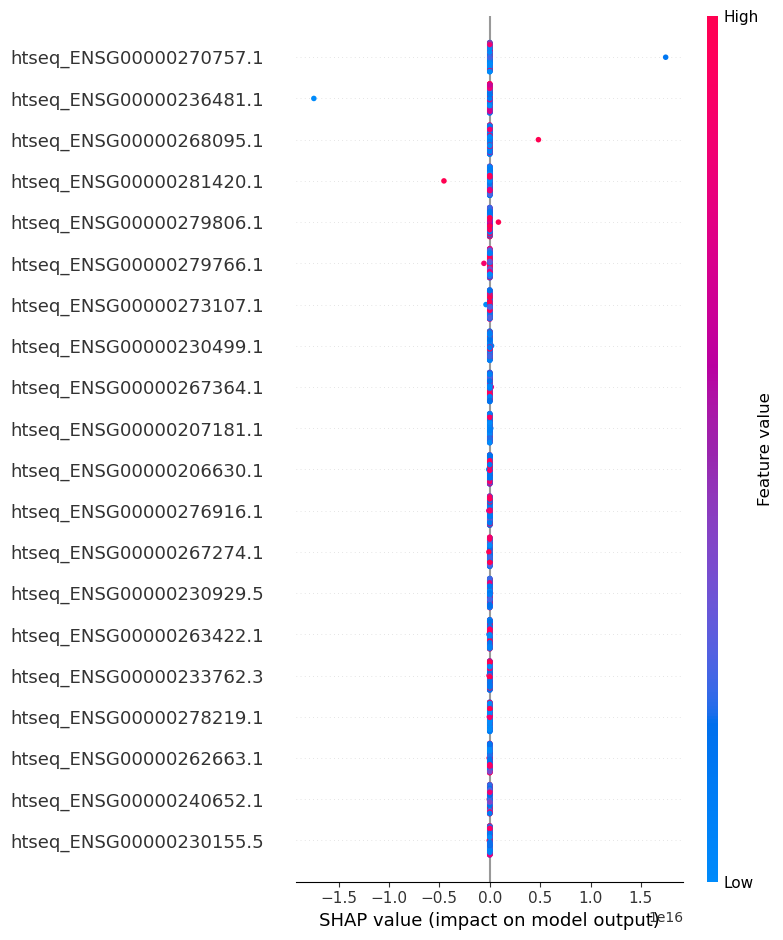

                     col_name  feature_importance_vals
16    htseq_ENSG00000236481.1             1.057664e+14
39    htseq_ENSG00000270757.1             1.057664e+14
76    htseq_ENSG00000268095.1             2.925624e+13
93    htseq_ENSG00000281420.1             2.755033e+13
100   htseq_ENSG00000279806.1             5.210874e+12
..                        ...                      ...
29   htseq_ENSG00000100147.12             2.911051e-03
111   htseq_ENSG00000240350.2             2.849560e-03
128   htseq_ENSG00000163191.5             2.653166e-03
138  htseq_ENSG00000161944.15             2.628371e-03
95    htseq_ENSG00000250470.1             2.290584e-03

[152 rows x 2 columns]
sum shap 288203785143924.44
sum shap 1.0
[0.366984614141685, 0.366984614141685, 0.10151232972298486, 0.09559322304328026, 0.018080517233648848, 0.012161410553944381, 0.007880586443361376, 0.0037259930962070305, 0.0032373615534735225, 0.00216807449013184, 0.002161995994095486, 0.002027973358799083, 0.001822729905921

  0%|          | 0/165 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


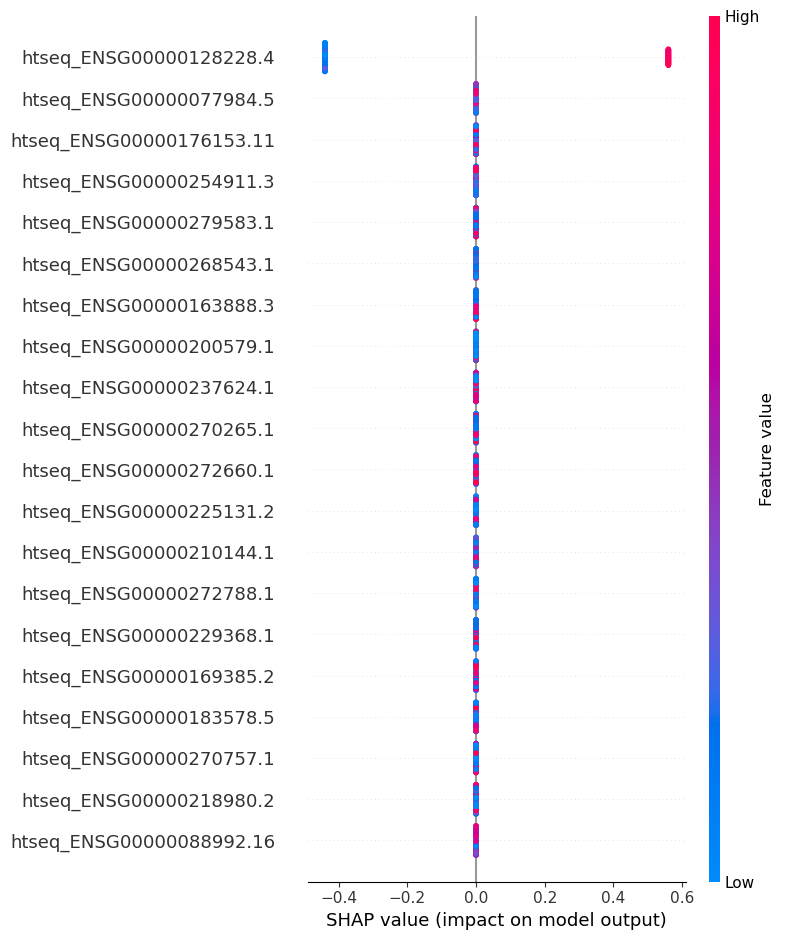

                    col_name  feature_importance_vals
71   htseq_ENSG00000128228.4                 0.482909
0    htseq_ENSG00000281780.1                 0.000000
105  htseq_ENSG00000275011.1                 0.000000
98   htseq_ENSG00000232387.2                 0.000000
99   htseq_ENSG00000178363.4                 0.000000
..                       ...                      ...
51   htseq_ENSG00000268543.1                 0.000000
52   htseq_ENSG00000279583.1                 0.000000
53   htseq_ENSG00000254911.3                 0.000000
54   htseq_ENSG00000218980.2                 0.000000
151  htseq_ENSG00000077984.5                 0.000000

[152 rows x 2 columns]
sum shap 0.4829090909090907
sum shap 1.0
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

[03:27:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


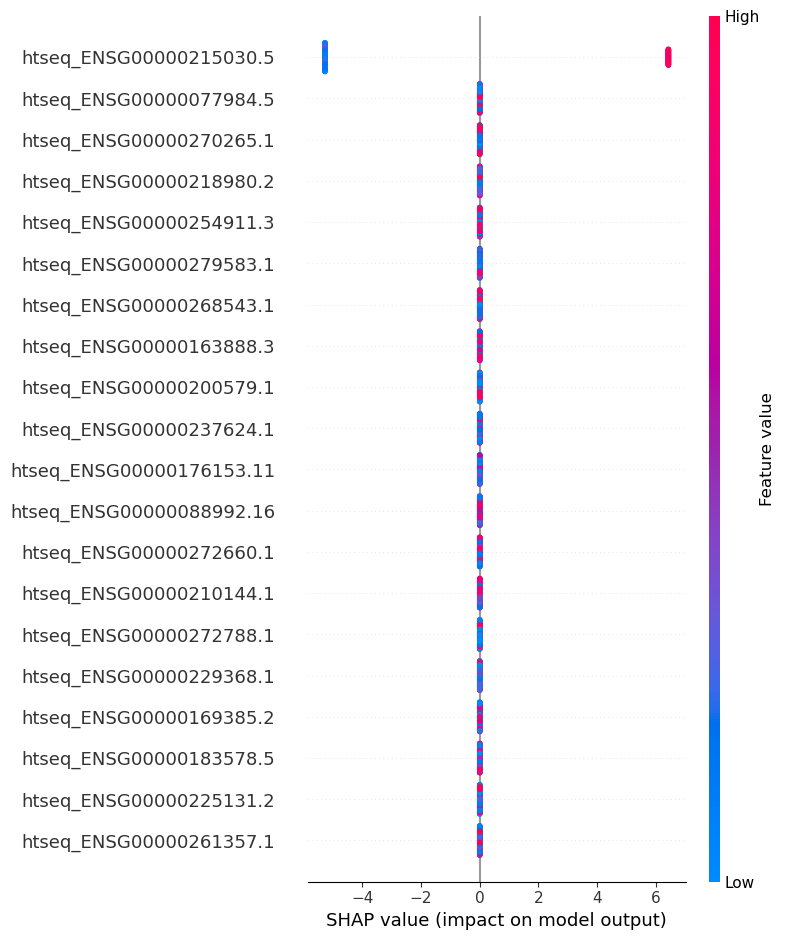

                    col_name  feature_importance_vals
7    htseq_ENSG00000215030.5                 5.684602
0    htseq_ENSG00000281780.1                 0.000000
105  htseq_ENSG00000275011.1                 0.000000
98   htseq_ENSG00000232387.2                 0.000000
99   htseq_ENSG00000178363.4                 0.000000
..                       ...                      ...
52   htseq_ENSG00000279583.1                 0.000000
53   htseq_ENSG00000254911.3                 0.000000
54   htseq_ENSG00000218980.2                 0.000000
55   htseq_ENSG00000225131.2                 0.000000
151  htseq_ENSG00000077984.5                 0.000000

[152 rows x 2 columns]
sum shap 5.6846022605896
sum shap 1.0
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

  0%|          | 0/165 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


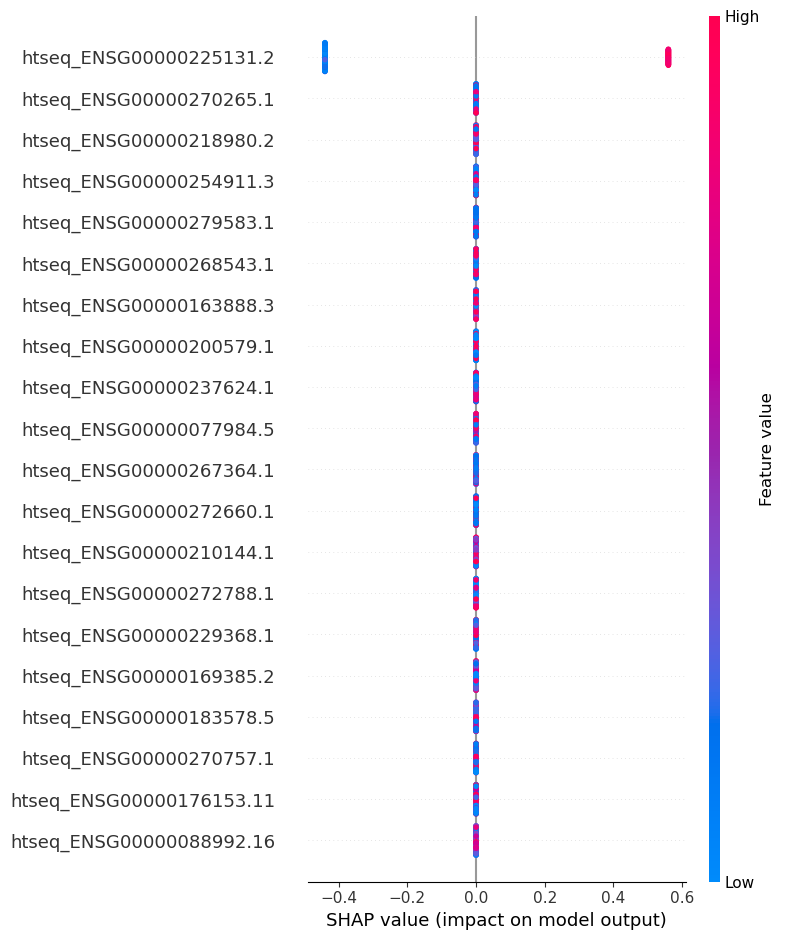

                    col_name  feature_importance_vals
55   htseq_ENSG00000225131.2                 0.482909
0    htseq_ENSG00000281780.1                 0.000000
104  htseq_ENSG00000234664.1                 0.000000
98   htseq_ENSG00000232387.2                 0.000000
99   htseq_ENSG00000178363.4                 0.000000
..                       ...                      ...
51   htseq_ENSG00000268543.1                 0.000000
52   htseq_ENSG00000279583.1                 0.000000
53   htseq_ENSG00000254911.3                 0.000000
54   htseq_ENSG00000218980.2                 0.000000
151  htseq_ENSG00000077984.5                 0.000000

[152 rows x 2 columns]
sum shap 0.4829090909090907
sum shap 1.0
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

  0%|          | 0/165 [00:00<?, ?it/s]

Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=5.242e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 22 iterations, i.e. alpha=1.451e-02, with an active set of 16 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 22 iterations, i.e. alpha=1.445e-02, with an active set of 16 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 23 iterations, alpha=1.440e-02, previous alpha=1.436e-02, with an active set of 16 regressors.
Early stopping the lars path, as the residues are small and the curren

Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 46 iterations, alpha=5.207e-04, previous alpha=5.128e-04, with an active set of 27 regressors.
Linear regression equation is singular, Moore-Penrose pseudoinverse is used instead of the regular inverse.
To use regular inverse do one of the following:
1) turn up the number of samples,
2) turn up the L1 regularization with num_features(N) where N is less than the number of samples,
3) group features together to reduce the number of inputs that need to be explained.
Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.804e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 64 iterations, alpha=7.727e-03, previous alpha=7.727e-03, wi

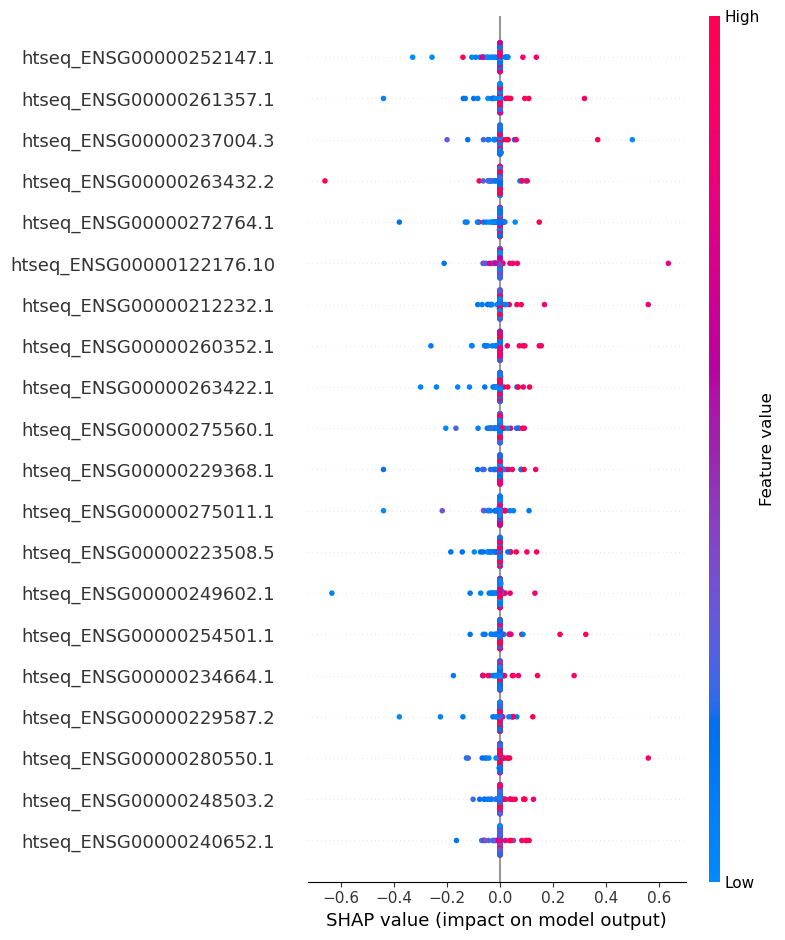

                     col_name  feature_importance_vals
62    htseq_ENSG00000252147.1                 0.010760
57    htseq_ENSG00000261357.1                 0.010204
121   htseq_ENSG00000237004.3                 0.009690
8     htseq_ENSG00000263432.2                 0.009230
70    htseq_ENSG00000272764.1                 0.008446
..                        ...                      ...
35    htseq_ENSG00000228606.1                 0.001697
58    htseq_ENSG00000278219.1                 0.001692
147   htseq_ENSG00000255495.1                 0.001490
132   htseq_ENSG00000232439.1                 0.001486
56   htseq_ENSG00000088992.16                 0.001321

[152 rows x 2 columns]
sum shap 0.6860901477806707
sum shap 0.9999999999999998
[0.015683396733215397, 0.014872607223554695, 0.014123182237125035, 0.013452387711954299, 0.012309627412155447, 0.012204802863666521, 0.011964780663027507, 0.011919884788363365, 0.011879392685467541, 0.011645982958949874, 0.011337417397832561, 0.011181998829313

  0%|          | 0/165 [00:00<?, ?it/s]

Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 138 iterations, alpha=2.619e-04, previous alpha=2.619e-04, with an active set of 37 regressors.
Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=6.490e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 70 iterations, alpha=1.173e-02, previous alpha=1.173e-02, with an active set of 35 regressors.
Regressors in active set degenerate. Dropping a regressor, after 37 iterations, i.e. alpha=1.533e-03, with an active set of 33 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no long

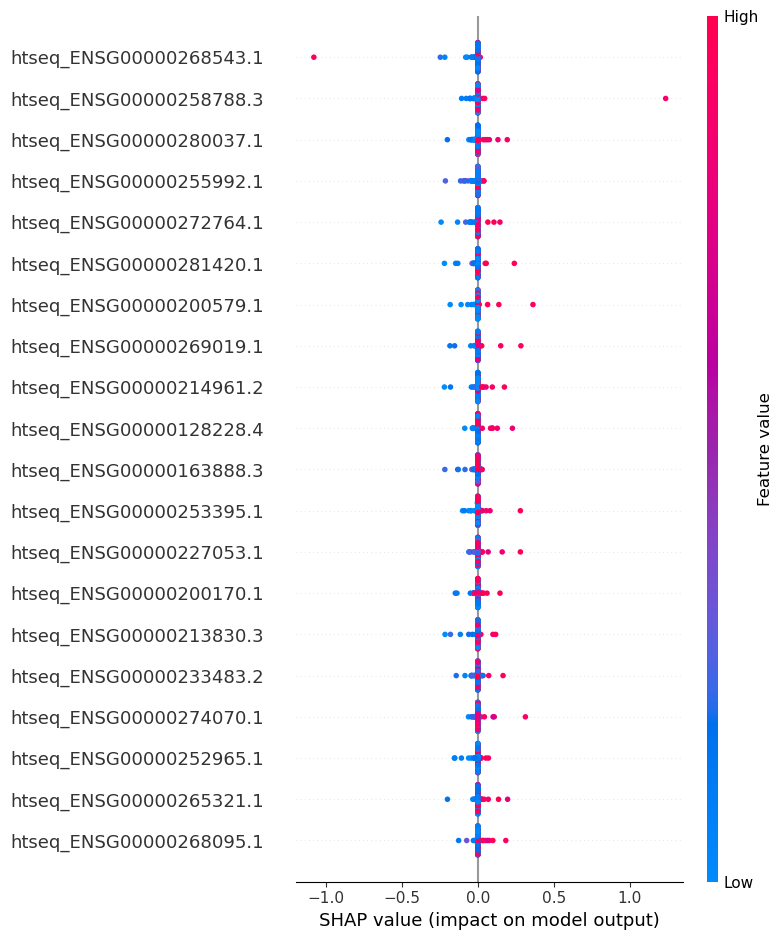

                     col_name  feature_importance_vals
51    htseq_ENSG00000268543.1                 0.011498
149   htseq_ENSG00000258788.3                 0.010654
136   htseq_ENSG00000280037.1                 0.006962
18    htseq_ENSG00000255992.1                 0.006776
70    htseq_ENSG00000272764.1                 0.006418
..                        ...                      ...
65    htseq_ENSG00000280231.1                 0.001245
123   htseq_ENSG00000279487.1                 0.001167
129  htseq_ENSG00000143167.10                 0.001144
56   htseq_ENSG00000088992.16                 0.001057
32    htseq_ENSG00000240652.1                 0.000659

[152 rows x 2 columns]
sum shap 0.5135462166469407
sum shap 1.0000000000000002
[0.022389637780433947, 0.02074510716629732, 0.013557028077060591, 0.013193620079133196, 0.012497035417218819, 0.012291931228581807, 0.012145566761502075, 0.011366257825438087, 0.011289978432459078, 0.011252418614212206, 0.011192222632444683, 0.0107321688565068

  0%|          | 0/165 [00:00<?, ?it/s]

Regressors in active set degenerate. Dropping a regressor, after 11 iterations, i.e. alpha=5.669e-03, with an active set of 7 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 36 iterations, alpha=2.031e-03, previous alpha=1.822e-03, with an active set of 17 regressors.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=6.535e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 19 iterations, i.e. alpha=2.067e-02, with an active set of 15 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


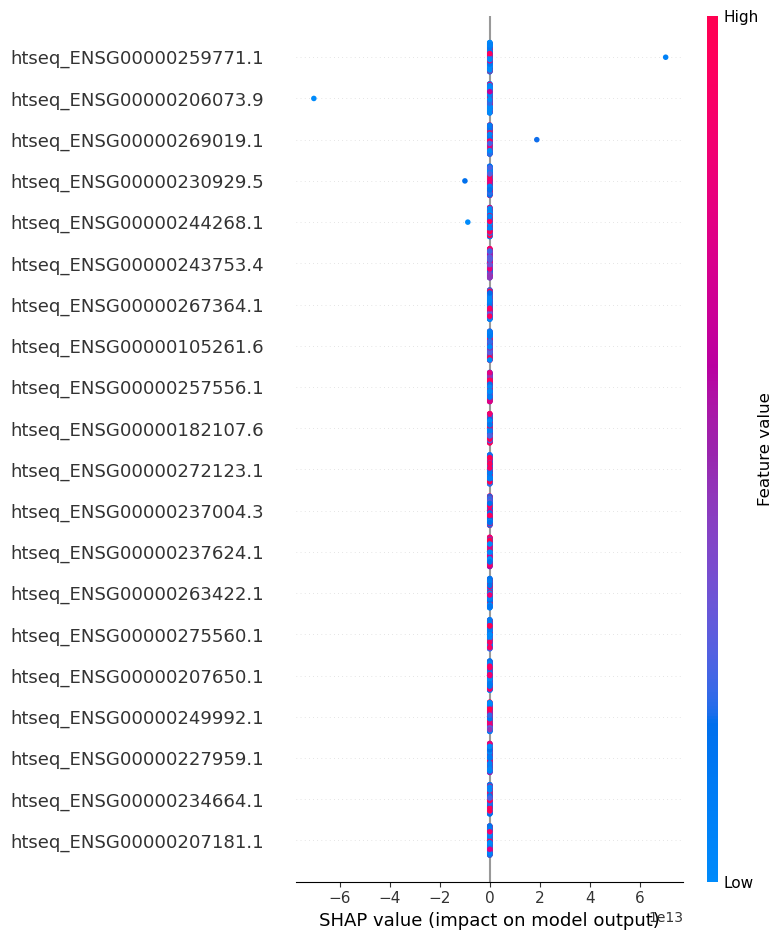

                    col_name  feature_importance_vals
137  htseq_ENSG00000259771.1             4.264772e+11
11   htseq_ENSG00000206073.9             4.264772e+11
5    htseq_ENSG00000269019.1             1.140565e+11
4    htseq_ENSG00000230929.5             6.024151e+10
141  htseq_ENSG00000244268.1             5.321425e+10
..                       ...                      ...
151  htseq_ENSG00000077984.5             2.530536e-03
66   htseq_ENSG00000269403.1             2.364360e-03
93   htseq_ENSG00000281420.1             2.262133e-03
96   htseq_ENSG00000276931.1             2.211407e-03
76   htseq_ENSG00000268095.1             1.644555e-03

[152 rows x 2 columns]
sum shap 1081067540808.0641
sum shap 0.9999999999999997
[0.3944963856019705, 0.39449638560197015, 0.10550361439762253, 0.055724095776815835, 0.049223793277625216, 0.0005557253431913305, 3.7666171989928026e-14, 2.45288928581493e-14, 1.0199443087250286e-14, 9.924283077243899e-15, 9.45271453892678e-15, 9.240911567192067e-15, 9.09

  0%|          | 0/165 [00:00<?, ?it/s]

Regressors in active set degenerate. Dropping a regressor, after 19 iterations, i.e. alpha=1.857e-03, with an active set of 19 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 32 iterations, alpha=9.690e-04, previous alpha=9.426e-04, with an active set of 23 regressors.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 89 iterations, alpha=1.693e-05, previous alpha=1.514e-05, with an active set of 34 regressors.
Regressors in active set degenerate. Dropping a regressor, after 19 iterations, i.e. alpha=1.549e-03, with an active set of 17 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 22 iterations, i.e. alpha=7.454

Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 38 iterations, alpha=2.098e-03, previous alpha=2.098e-03, with an active set of 13 regressors.
Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=9.046e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=3.343e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 9 iterations, i.e. alpha=2.680e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current va

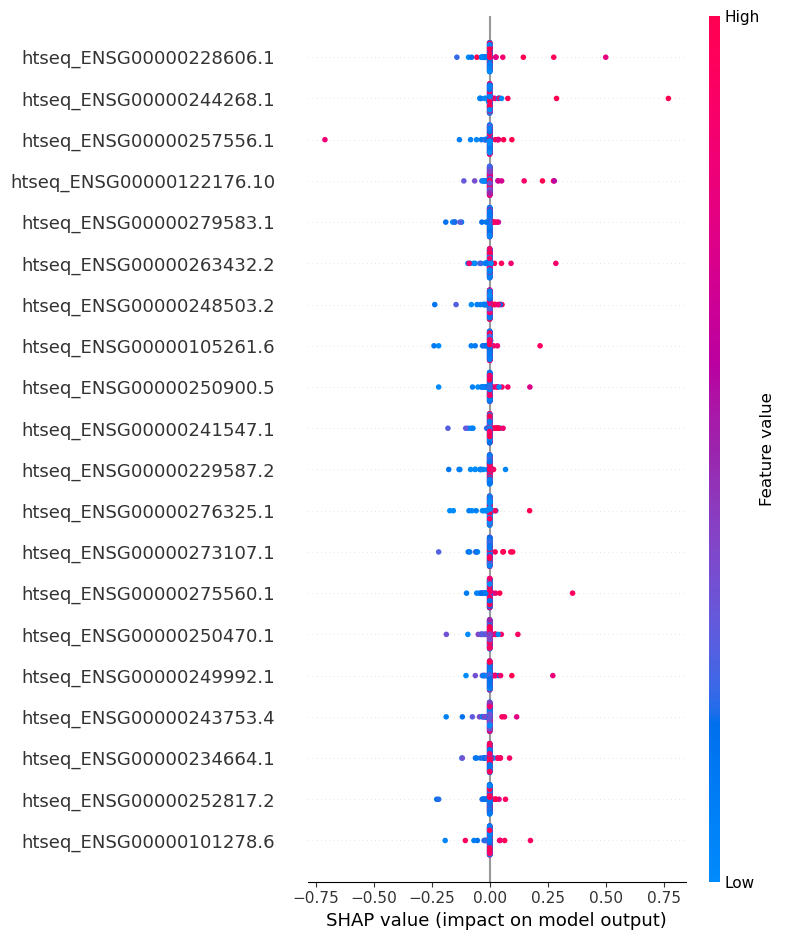

                     col_name  feature_importance_vals
35    htseq_ENSG00000228606.1                 0.010090
141   htseq_ENSG00000244268.1                 0.009256
38    htseq_ENSG00000257556.1                 0.008463
27   htseq_ENSG00000122176.10                 0.008366
52    htseq_ENSG00000279583.1                 0.006559
..                        ...                      ...
91    htseq_ENSG00000228661.1                 0.001403
105   htseq_ENSG00000275011.1                 0.001382
45    htseq_ENSG00000272660.1                 0.001085
50    htseq_ENSG00000163888.3                 0.001025
137   htseq_ENSG00000259771.1                 0.000821

[152 rows x 2 columns]
sum shap 0.529147507127716
sum shap 1.0000000000000002
[0.019069063057549372, 0.017493103998283237, 0.015994388755717487, 0.01580971258094857, 0.012395834759746762, 0.011611194088935167, 0.011425412373431924, 0.011312208429879272, 0.011029042061952694, 0.010909578430062886, 0.010485786757958564, 0.01031449711217557

  0%|          | 0/165 [00:00<?, ?it/s]

Linear regression equation is singular, Moore-Penrose pseudoinverse is used instead of the regular inverse.
To use regular inverse do one of the following:
1) turn up the number of samples,
2) turn up the L1 regularization with num_features(N) where N is less than the number of samples,
3) group features together to reduce the number of inputs that need to be explained.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 62 iterations, alpha=2.715e-04, previous alpha=2.657e-04, with an active set of 33 regressors.
Regressors in active set degenerate. Dropping a regressor, after 43 iterations, i.e. alpha=4.676e-05, with an active set of 31 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 44 iterations, alpha=4.676e-05, previous alpha=4.610e-05, 

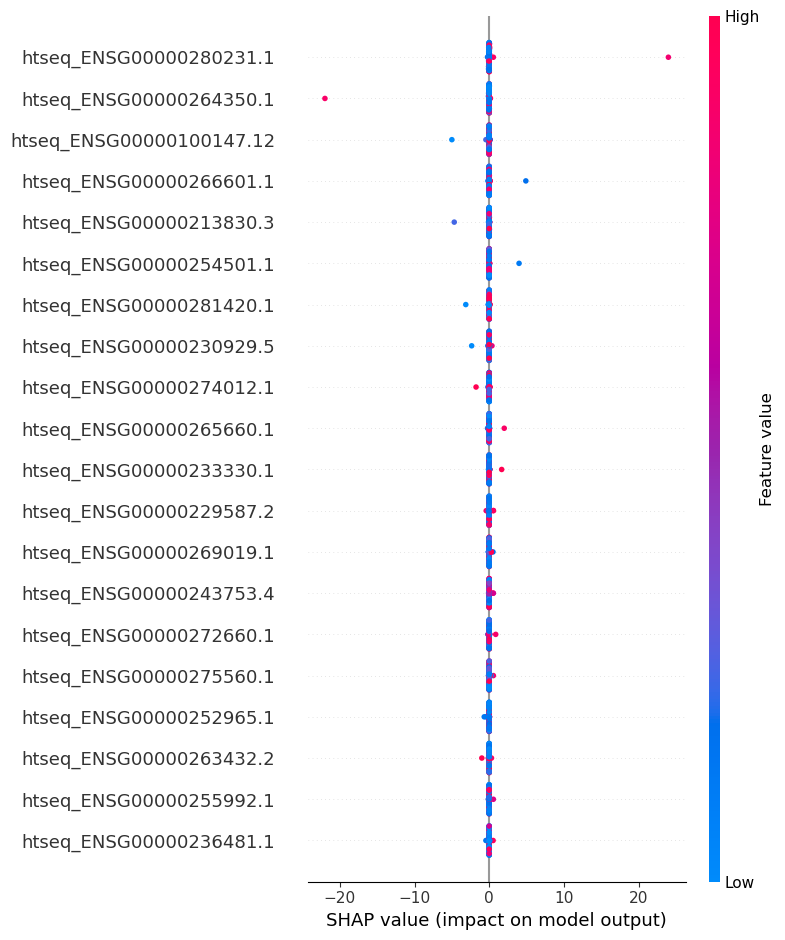

                     col_name  feature_importance_vals
65    htseq_ENSG00000280231.1                 0.158263
60    htseq_ENSG00000264350.1                 0.138007
29   htseq_ENSG00000100147.12                 0.037140
19    htseq_ENSG00000266601.1                 0.035586
80    htseq_ENSG00000213830.3                 0.032315
..                        ...                      ...
43    htseq_ENSG00000272788.1                 0.002397
143   htseq_ENSG00000276916.1                 0.002282
122   htseq_ENSG00000248503.2                 0.002049
57    htseq_ENSG00000261357.1                 0.001942
117   htseq_ENSG00000255650.4                 0.001936

[152 rows x 2 columns]
sum shap 1.3870662967650318
sum shap 0.9999999999999994
[0.11409882355215943, 0.09949532063221475, 0.026775690185231894, 0.025655315457173068, 0.023297709526612524, 0.019748659745436232, 0.01813386810064203, 0.01590384419768132, 0.012845516856642543, 0.012605339826545551, 0.011086298402926228, 0.009960004028858514,

  0%|          | 0/165 [00:00<?, ?it/s]

Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=5.687e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 44 iterations, alpha=1.065e-02, previous alpha=1.036e-02, with an active set of 27 regressors.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 51 iterations, alpha=7.817e-04, previous alpha=5.866e-04, with an active set of 32 regressors.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 69 iterations, alpha=4.939e-04, previous alpha=4.283e-04, with an active set of 24 regressors.
Regressors in active set degenerate. Dropping a regressor, after 12 iterations, i.e. alpha=5.873e-03, with an active set of 12

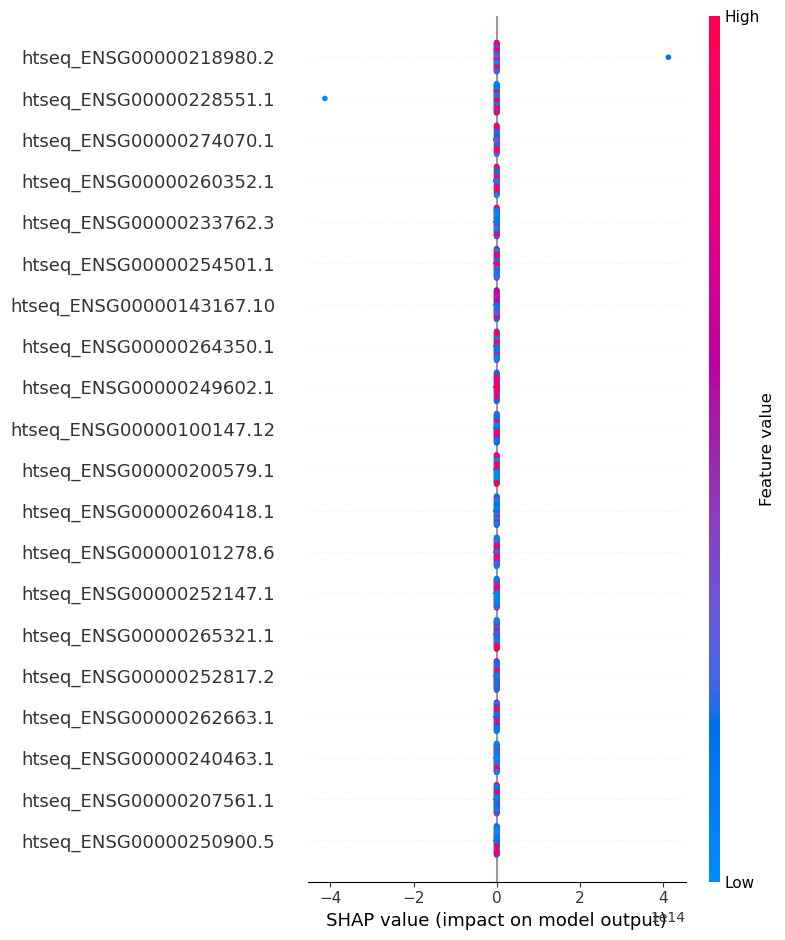

                    col_name  feature_importance_vals
54   htseq_ENSG00000218980.2             2.503603e+12
110  htseq_ENSG00000228551.1             2.503603e+12
144  htseq_ENSG00000274070.1             3.582155e-02
124  htseq_ENSG00000260352.1             3.157340e-02
23   htseq_ENSG00000233762.3             2.870812e-02
..                       ...                      ...
130  htseq_ENSG00000213315.5             2.204198e-03
98   htseq_ENSG00000232387.2             2.190251e-03
97   htseq_ENSG00000279766.1             2.036012e-03
10   htseq_ENSG00000274012.1             1.915810e-03
137  htseq_ENSG00000259771.1             1.784732e-03

[152 rows x 2 columns]
sum shap 5007206032949.355
sum shap 1.0000000000000002
[0.4999999999999152, 0.4999999999999112, 7.153999379699095e-15, 6.305593101768821e-15, 5.733361952842581e-15, 3.920730182645444e-15, 3.3319889192160475e-15, 2.6596311497334356e-15, 2.5566791373143287e-15, 2.4431014230612733e-15, 2.3970188561819955e-15, 2.1765940270851134e-

  0%|          | 0/165 [00:00<?, ?it/s]

Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 24 iterations, alpha=4.304e-04, previous alpha=4.304e-04, with an active set of 17 regressors.
Linear regression equation is singular, Moore-Penrose pseudoinverse is used instead of the regular inverse.
To use regular inverse do one of the following:
1) turn up the number of samples,
2) turn up the L1 regularization with num_features(N) where N is less than the number of samples,
3) group features together to reduce the number of inputs that need to be explained.
Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.583e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 8 iterations, i.e. alpha=7.913e-03, with an active set of 4 regressors, and the smallest cholesky pivot element 

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


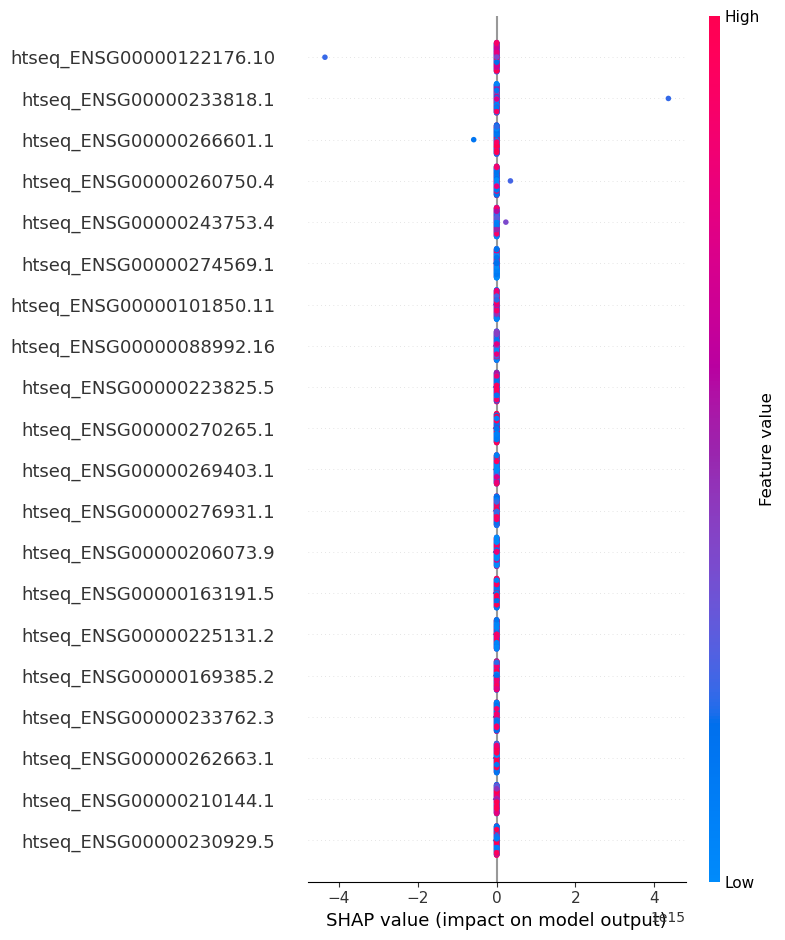

                     col_name  feature_importance_vals
27   htseq_ENSG00000122176.10             2.642082e+13
113   htseq_ENSG00000233818.1             2.642082e+13
19    htseq_ENSG00000266601.1             3.531232e+12
148   htseq_ENSG00000260750.4             2.118739e+12
6     htseq_ENSG00000243753.4             1.412493e+12
..                        ...                      ...
126  htseq_ENSG00000160284.13             2.745139e-03
80    htseq_ENSG00000213830.3             2.669675e-03
112   htseq_ENSG00000241547.1             2.656459e-03
94    htseq_ENSG00000266032.1             2.344724e-03
35    htseq_ENSG00000228606.1             2.063612e-03

[152 rows x 2 columns]
sum shap 59904102211516.21
sum shap 0.9999999999999997
[0.4410519247323255, 0.4410519247323255, 0.058948075267666454, 0.03536884516060458, 0.023579230107061935, 4.647154421210006e-16, 2.352244644205273e-16, 1.9836019452270173e-16, 1.8529007155212765e-16, 1.8197484732415234e-16, 1.7703332851357886e-16, 1.70623340783

  0%|          | 0/165 [00:00<?, ?it/s]

Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 57 iterations, alpha=1.705e-04, previous alpha=1.705e-04, with an active set of 30 regressors.
Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.655e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 30 iterations, alpha=1.707e-02, previous alpha=1.687e-02, with an active set of 13 regressors.
Linear regression equation is singular, Moore-Penrose pseudoinverse is used instead of the regular inverse.
To use regular inverse do one of the following:
1) turn up the number of samples,
2) turn up the L1 regularization with num_features(N) where N is less than the number of samples,
3) group features together to reduce the number of

Regressors in active set degenerate. Dropping a regressor, after 53 iterations, i.e. alpha=1.512e-04, with an active set of 33 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 54 iterations, alpha=1.512e-04, previous alpha=1.495e-04, with an active set of 33 regressors.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 28 iterations, alpha=6.678e-05, previous alpha=6.060e-05, with an active set of 11 regressors.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 154 iterations, alpha=1.020e-03, previous alpha=1.020e-03, with an active set of 37 regressors.
Linear regression equation is singular, Moore-Penrose pseudoinverse is used instead of the regular inverse.
To use regular 

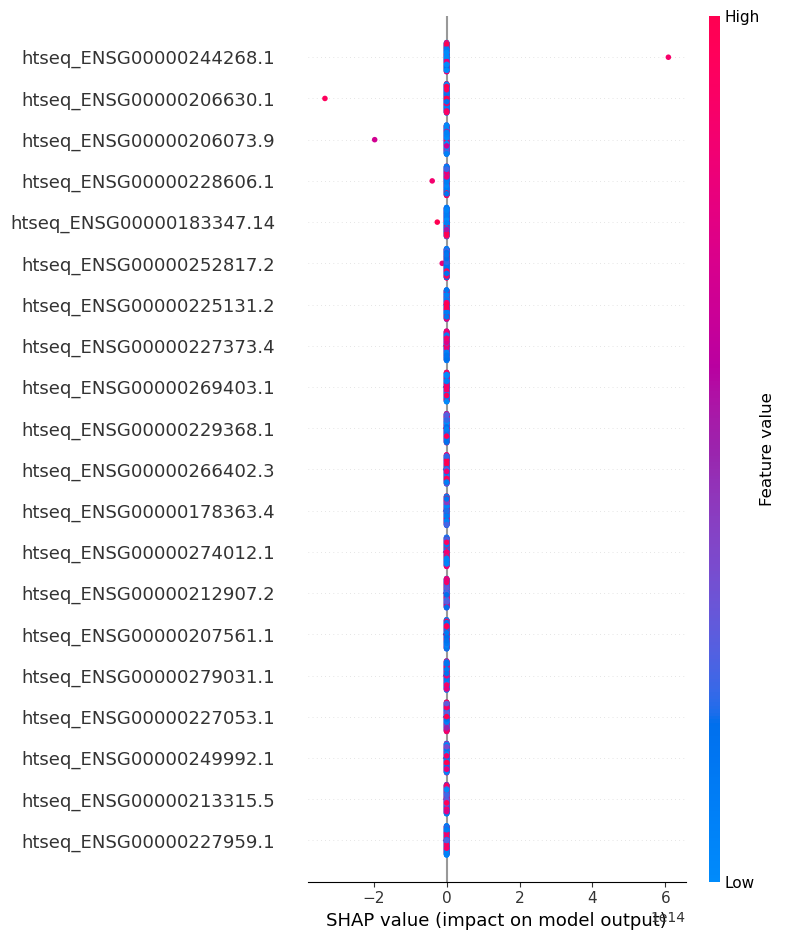

                     col_name  feature_importance_vals
141   htseq_ENSG00000244268.1             3.685602e+12
2     htseq_ENSG00000206630.1             2.022309e+12
11    htseq_ENSG00000206073.9             1.195529e+12
35    htseq_ENSG00000228606.1             2.395169e+11
12   htseq_ENSG00000183347.14             1.552589e+11
..                        ...                      ...
49    htseq_ENSG00000200579.1             1.504413e-03
13    htseq_ENSG00000230499.1             1.426091e-03
123   htseq_ENSG00000279487.1             1.240392e-03
87    htseq_ENSG00000223571.4             8.810336e-04
74    htseq_ENSG00000168143.8             7.480327e-04

[152 rows x 2 columns]
sum shap 7371204824896.84
sum shap 1.0000000000000004
[0.4999999999999564, 0.2743525511100805, 0.16218910597619185, 0.03249359426065747, 0.021062893501965975, 0.00990185515106235, 5.446689773811055e-15, 5.267690600777544e-15, 1.2311261652910031e-15, 1.1420694618072016e-15, 9.944430067677575e-16, 9.923992254533292e-

X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names


  0%|          | 0/165 [00:00<?, ?it/s]

X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
Regressors in ac

X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have 

X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have 

X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 90 iterations, alpha=2.494e-04, previous alpha=2.494e-04, with an active set of 37 regressors.
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
Linear regression equation is singular, Moore-Penr

X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have 

X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have 

X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have 

X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have 

X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have 

X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have 

X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have 

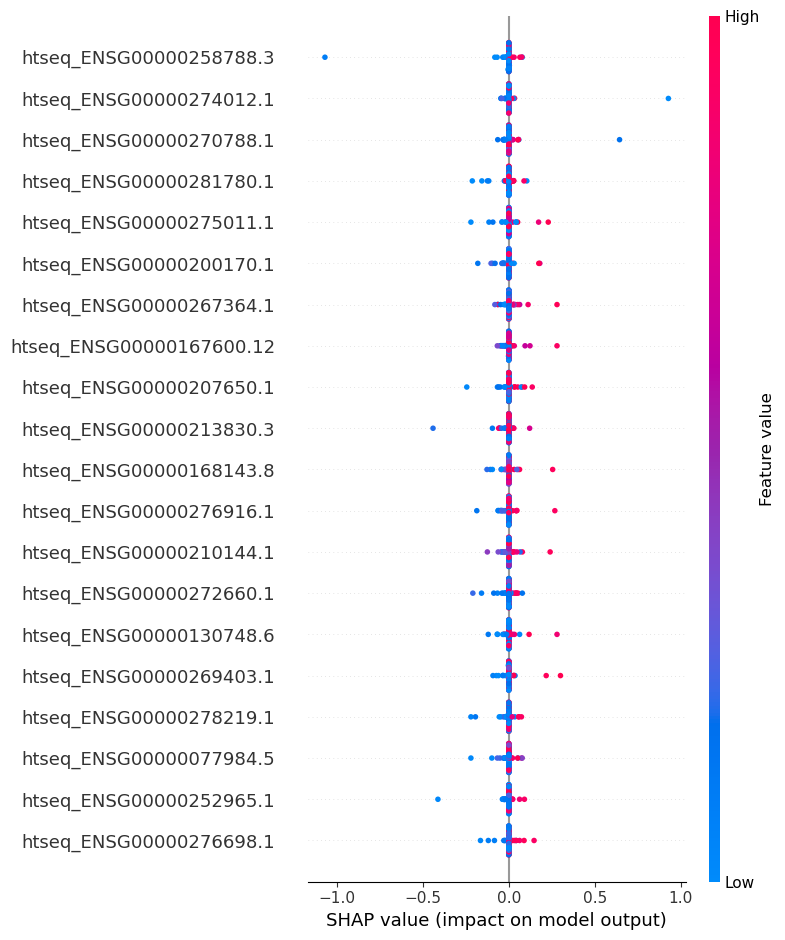

                    col_name  feature_importance_vals
149  htseq_ENSG00000258788.3                 0.009881
10   htseq_ENSG00000274012.1                 0.007447
3    htseq_ENSG00000270788.1                 0.006983
0    htseq_ENSG00000281780.1                 0.006910
105  htseq_ENSG00000275011.1                 0.006856
..                       ...                      ...
68   htseq_ENSG00000262703.1                 0.001451
60   htseq_ENSG00000264350.1                 0.001406
5    htseq_ENSG00000269019.1                 0.001341
41   htseq_ENSG00000169385.2                 0.000979
125  htseq_ENSG00000168334.8                 0.000840

[152 rows x 2 columns]
sum shap 0.5905858904613194
sum shap 1.0
[0.016730464710366266, 0.012609001928673124, 0.01182313653758974, 0.011700131738602761, 0.011608512171405792, 0.01138652111160002, 0.010996471472012591, 0.010969270286565455, 0.010804907936411022, 0.010771797773711438, 0.010709816470713793, 0.010615795608566028, 0.010003183064833176, 0.

  0%|          | 0/165 [00:00<?, ?it/s]

Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.160e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.580e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 20 iterations, alpha=2.196e-02, previous alpha=2.186e-02, with an active set of 13 regressors.
Regressors in active set degenerate. Dropping a regressor, after 14 iterations, i.e. alpha=3.972e-06, with an active set of 12 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 37 iter

Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=1.652e-02, with an active set of 7 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 89 iterations, alpha=4.207e-03, previous alpha=4.082e-03, with an active set of 48 regressors.
Regressors in active set degenerate. Dropping a regressor, after 9 iterations, i.e. alpha=3.584e-02, with an active set of 7 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 50 iterations, alpha=5.521e-03, previous alpha=5.482e-03, with an active set of 25 regressors.
Linear regression equation is singular, Moore-Penrose pseudoinverse is used instead of the regular i

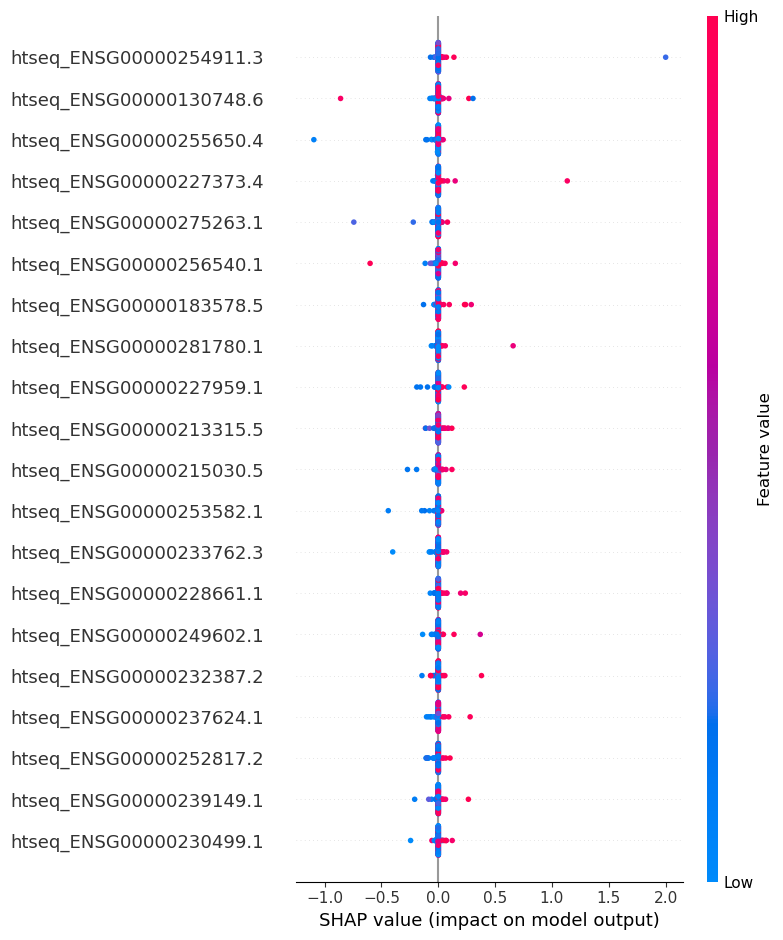

                    col_name  feature_importance_vals
53   htseq_ENSG00000254911.3                 0.015515
9    htseq_ENSG00000130748.6                 0.013432
117  htseq_ENSG00000255650.4                 0.010465
84   htseq_ENSG00000227373.4                 0.010288
1    htseq_ENSG00000275263.1                 0.008864
..                       ...                      ...
144  htseq_ENSG00000274070.1                 0.001221
76   htseq_ENSG00000268095.1                 0.001126
42   htseq_ENSG00000229368.1                 0.000729
142  htseq_ENSG00000263422.1                 0.000714
75   htseq_ENSG00000228201.1                 0.000552

[152 rows x 2 columns]
sum shap 0.5694764580655983
sum shap 0.9999999999999993
[0.027243900186437315, 0.0235857673603087, 0.018377326630335648, 0.018066445546127068, 0.015565560998644081, 0.015531896105512649, 0.013594044632204288, 0.011610087774525376, 0.011239460082989958, 0.01115406557288606, 0.010980076861031224, 0.010469979999398863, 0.01039095

  0%|          | 0/165 [00:00<?, ?it/s]

Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 55 iterations, alpha=1.089e-03, previous alpha=1.086e-03, with an active set of 20 regressors.
Regressors in active set degenerate. Dropping a regressor, after 29 iterations, i.e. alpha=8.953e-04, with an active set of 25 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 36 iterations, i.e. alpha=4.477e-04, with an active set of 28 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 37 iterations, alpha=4.477e-04, previous alpha=4.441e-04, with an active set of 28 regressors.
Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=6.896e

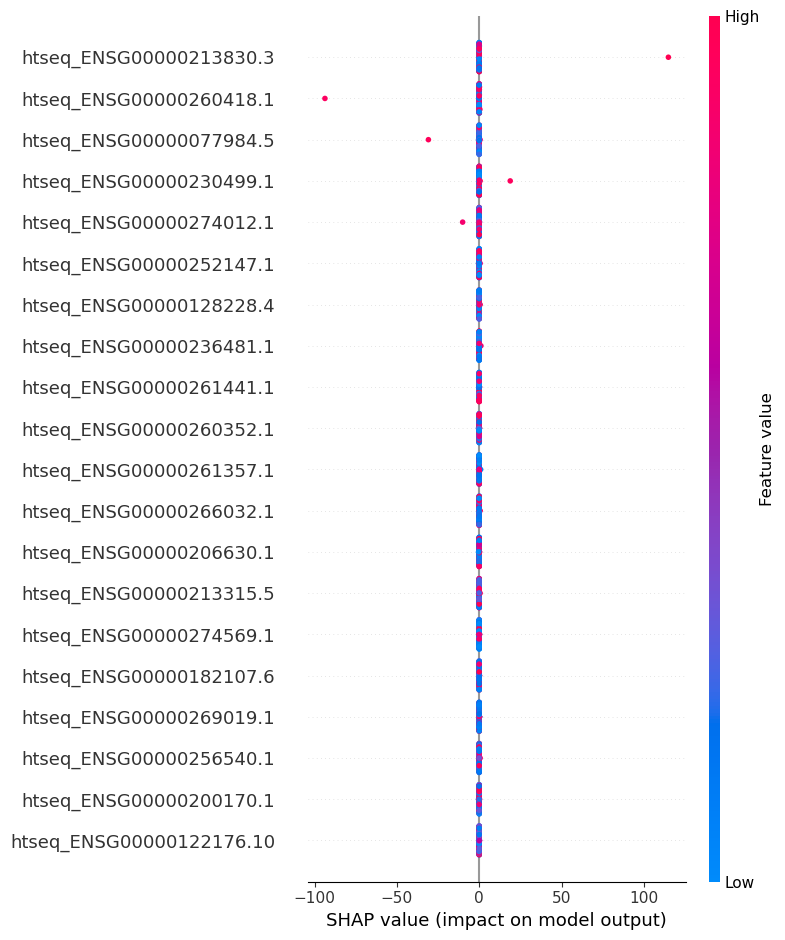

                     col_name  feature_importance_vals
80    htseq_ENSG00000213830.3                 0.699777
21    htseq_ENSG00000260418.1                 0.579321
151   htseq_ENSG00000077984.5                 0.197349
13    htseq_ENSG00000230499.1                 0.121528
10    htseq_ENSG00000274012.1                 0.066536
..                        ...                      ...
35    htseq_ENSG00000228606.1                 0.002850
60    htseq_ENSG00000264350.1                 0.002704
47    htseq_ENSG00000270265.1                 0.002682
138  htseq_ENSG00000161944.15                 0.002551
69    htseq_ENSG00000101278.6                 0.002336

[152 rows x 2 columns]
sum shap 2.5183178274987426
sum shap 1.0000000000000009
[0.277874777110359, 0.23004272275879833, 0.07836534205457818, 0.04825753622734778, 0.026420874214705452, 0.005101719992817263, 0.004491551313777965, 0.00414060633360747, 0.004018824492200961, 0.003947106479212802, 0.003892018053372852, 0.0038775012635136087, 0

  0%|          | 0/165 [00:00<?, ?it/s]

Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 82 iterations, alpha=7.756e-04, previous alpha=7.756e-04, with an active set of 27 regressors.
Regressors in active set degenerate. Dropping a regressor, after 44 iterations, i.e. alpha=3.586e-05, with an active set of 28 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 60 iterations, alpha=2.203e-05, previous alpha=2.179e-05, with an active set of 27 regressors.
Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.121e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longe

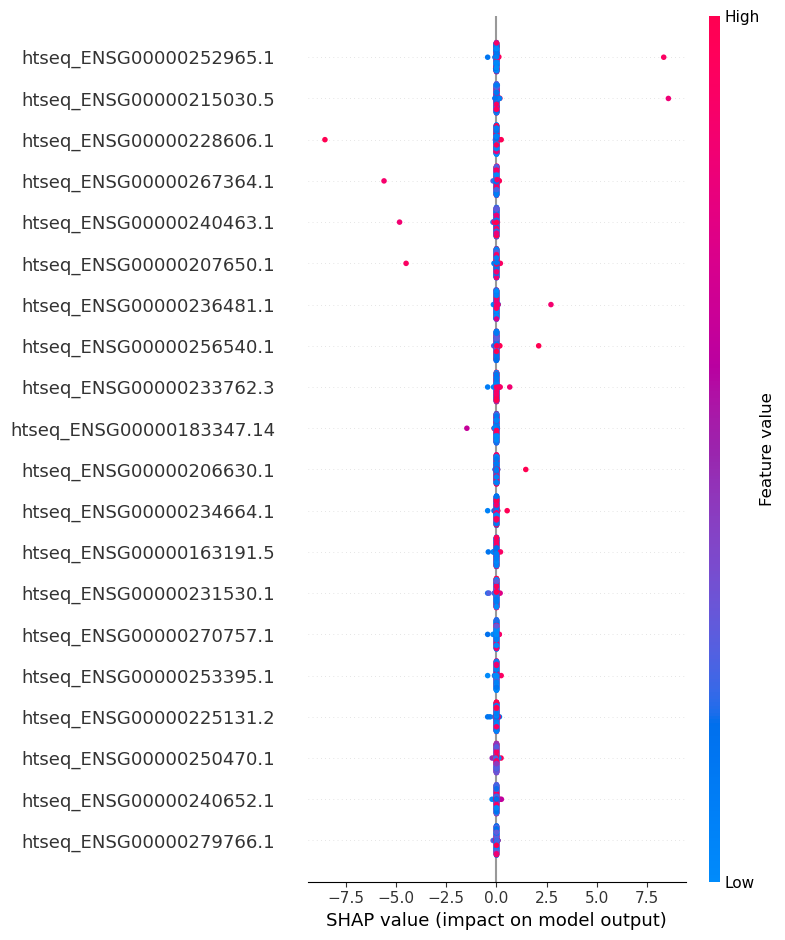

                    col_name  feature_importance_vals
131  htseq_ENSG00000252965.1                 0.058015
7    htseq_ENSG00000215030.5                 0.057999
35   htseq_ENSG00000228606.1                 0.056519
150  htseq_ENSG00000267364.1                 0.039704
85   htseq_ENSG00000240463.1                 0.034833
..                       ...                      ...
113  htseq_ENSG00000233818.1                 0.002556
125  htseq_ENSG00000168334.8                 0.002320
127  htseq_ENSG00000223825.5                 0.002304
123  htseq_ENSG00000279487.1                 0.002278
14   htseq_ENSG00000249602.1                 0.002075

[152 rows x 2 columns]
sum shap 1.1297192381200893
sum shap 1.0000000000000002
[0.051353073159791526, 0.05133916841702648, 0.05002891419895019, 0.0351447122190652, 0.030833645584258773, 0.02836953525522021, 0.01958181043625462, 0.015468749494209592, 0.01207475979781965, 0.011877417374326267, 0.010139618312178118, 0.009575669518684292, 0.008983317369

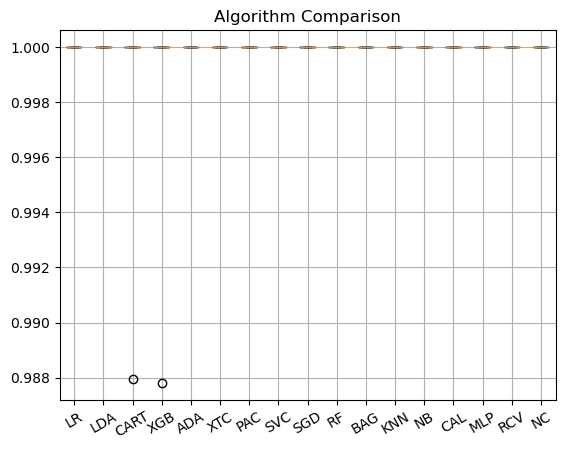

In [39]:
from sklearn import metrics
# evaluate each model in turn, but only with training data set using 10-fold CV
results = []
names = []
classifRep = []
resultsAll = []

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr', random_state = 0)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier(random_state = 0)))
models.append(('XGB', XGBClassifier(random_state = 0)))
models.append(('ADA', AdaBoostClassifier(n_estimators=100, random_state=0)))
models.append(('XTC', ExtraTreesClassifier(random_state = 0)))
models.append(('PAC', PassiveAggressiveClassifier(random_state=0)))
models.append(('SVC', svm.SVC(kernel = 'linear', probability=True, random_state = 0)))
models.append(('SGD', SGDClassifier(max_iter=1000, tol=1e-3, random_state = 0, loss="log_loss")))
models.append(('RF', RandomForestClassifier(random_state = 0)))
models.append(('BAG', BaggingClassifier(DecisionTreeClassifier(), n_estimators=10, random_state=0)))

models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('CAL', CalibratedClassifierCV(GaussianNB(), cv=3)))
models.append(('MLP', MLPClassifier(random_state = 0)))
models.append(('RCV', RidgeClassifierCV()))
models.append(('NC', NearestCentroid()))

from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
import shap
from sklearn.preprocessing import MinMaxScaler

allFeatName = {}
overlap = {}

for name, model in models:
    
    model.fit(X_train, y_train.values.ravel())
    
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    if name == 'KNN':
        cv_results = cross_val_score(model, newAll.values, newAllLabel.values.ravel(), cv=kfold, scoring='accuracy')
    else:
        cv_results = cross_val_score(model, newAll, newAllLabel.values.ravel(), cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    resultsAll.append(cv_results.mean())
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
#     if name != 'PAC':
        
#         #plot - comment out for acc
#         ax = plt.gca()
#         y_pred_proba = model.predict_proba(X_test)[::,1]
#         fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#         auc = metrics.roc_auc_score(y_test, y_pred_proba)
#         plt.plot(fpr,tpr,label=name)
#         plt.legend(loc=4)
#         plt.title('ROC Curve Comparison')

    # Choose one of the following methods to summarize the background
    # Option 1: shap.sample
    background_summary = shap.sample(X_train, 25)  # Adjust the number of samples (K)
    # Option 2: shap.kmeans
    # background_summary = shap.kmeans(X_train, 100)  # Adjust the number of samples (K)

    if name == 'XGB':
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
    else:
        explainer = shap.KernelExplainer(model.predict, background_summary)
        shap_values = explainer.shap_values(X_test, nsamples=100)
        
    shap.summary_plot(shap_values,X_test)

    feature_names = X_train.columns

    rf_resultX = pd.DataFrame(shap_values, columns = feature_names)

    vals = np.abs(rf_resultX.values).mean(0)

    shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                      columns=['col_name','feature_importance_vals'])
    shap_importance.sort_values(by=['feature_importance_vals'],
                                   ascending=False, inplace=True)
    print(shap_importance)
    print('sum shap', sum(shap_importance['feature_importance_vals']))
    
    df = shap_importance['feature_importance_vals']
    
    df_scaled = [float(i)/sum(df) for i in df]
    
    shap_importance.drop('feature_importance_vals',  axis=1)
    shap_importance['feature_importance_vals'] = df_scaled
    
    print('sum shap', sum(shap_importance['feature_importance_vals']))

    # Print the scaled data
    print(df_scaled)
    
    for i in shap_importance['col_name']:
        if i not in overlap:
            overlap[i] = shap_importance.loc[shap_importance.col_name == i, 'feature_importance_vals'].values[0]
        else: 
            overlap[i] = overlap[i] + shap_importance.loc[shap_importance.col_name == i, 'feature_importance_vals'].values[0]
    overlapSort = sorted(overlap.items(), key=lambda x:x[1], reverse=True)
    
from matplotlib import pyplot
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.xticks(rotation=30)
pyplot.grid()
pyplot.show()

In [40]:
resultsAll

[1.0,
 1.0,
 0.9987951807228915,
 0.998780487804878,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                2448      
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,737
Trainable params: 2,737
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
53/53 [==============================] - 5s 11ms/step - loss: 0.0979 - accuracy: 0.9829 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 2/80
53/53 [==============================] - 0s 5ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 3/80
53/53 [=================

  0%|          | 0/165 [00:00<?, ?it/s]

79/79 [==============================] - 0s 2ms/step


Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=5.299e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 71 iterations, alpha=9.412e-03, previous alpha=9.408e-03, with an active set of 18 regressors.


79/79 [==============================] - 0s 2ms/step


Regressors in active set degenerate. Dropping a regressor, after 28 iterations, i.e. alpha=5.913e-04, with an active set of 24 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 33 iterations, i.e. alpha=3.044e-04, with an active set of 29 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 36 iterations, alpha=2.583e-04, previous alpha=2.432e-04, with an active set of 31 regressors.


79/79 [==============================] - 0s 3ms/step


Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.001e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 15 iterations, i.e. alpha=3.000e-02, with an active set of 15 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 15 iterations, i.e. alpha=2.996e-02, with an active set of 15 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 16 iterations, alpha=3.000e-02, previous alpha=2.996e-02, with an active set of 15 regressors.


79/79 [==============================] - 0s 2ms/step


Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 103 iterations, alpha=1.544e-04, previous alpha=1.540e-04, with an active set of 34 regressors.


79/79 [==============================] - 0s 3ms/step


Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.210e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 39 iterations, alpha=1.374e-02, previous alpha=1.367e-02, with an active set of 12 regressors.


79/79 [==============================] - 0s 2ms/step


Regressors in active set degenerate. Dropping a regressor, after 18 iterations, i.e. alpha=3.430e-03, with an active set of 14 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 27 iterations, alpha=1.612e-03, previous alpha=1.612e-03, with an active set of 18 regressors.


79/79 [==============================] - 0s 2ms/step


Regressors in active set degenerate. Dropping a regressor, after 66 iterations, i.e. alpha=1.138e-04, with an active set of 38 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 68 iterations, alpha=1.102e-04, previous alpha=1.087e-04, with an active set of 39 regressors.
Linear regression equation is singular, Moore-Penrose pseudoinverse is used instead of the regular inverse.
To use regular inverse do one of the following:
1) turn up the number of samples,
2) turn up the L1 regularization with num_features(N) where N is less than the number of samples,
3) group features together to reduce the number of inputs that need to be explained.


79/79 [==============================] - 0s 2ms/step


Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=9.054e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 70 iterations, alpha=2.313e-02, previous alpha=2.313e-02, with an active set of 29 regressors.


79/79 [==============================] - 0s 2ms/step


Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 59 iterations, alpha=3.248e-05, previous alpha=3.243e-05, with an active set of 40 regressors.


79/79 [==============================] - 0s 2ms/step


Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 64 iterations, alpha=1.904e-04, previous alpha=1.903e-04, with an active set of 35 regressors.


79/79 [==============================] - 0s 2ms/step


Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 94 iterations, alpha=1.478e-04, previous alpha=1.478e-04, with an active set of 35 regressors.


79/79 [==============================] - 0s 2ms/step


Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.063e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 75 iterations, i.e. alpha=1.389e-02, with an active set of 23 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 80 iterations, alpha=1.361e-02, previous alpha=1.322e-02, with an active set of 25 regressors.


79/79 [==============================] - 0s 2ms/step


Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=4.338e-02, with an active set of 7 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 66 iterations, i.e. alpha=8.110e-03, with an active set of 20 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 66 iterations, i.e. alpha=7.966e-03, with an active set of 20 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 68 iterations, alpha=8.033e-03, previous alpha=7.894e-03, with an active set of 21 regressors.


79/79 [==============================] - 0s 2ms/step


Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.803e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 22 iterations, alpha=3.564e-02, previous alpha=3.564e-02, with an active set of 17 regressors.


1/1 [==============================] - ETA: 0s

Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 45 iterations, alpha=1.577e-03, previous alpha=1.537e-03, with an active set of 26 regressors.
Linear regression equation is singular, Moore-Penrose pseudoinverse is used instead of the regular inverse.
To use regular inverse do one of the following:
1) turn up the number of samples,
2) turn up the L1 regularization with num_features(N) where N is less than the number of samples,
3) group features together to reduce the number of inputs that need to be explained.


1/1 [==============================] - ETA: 0s

Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 13 iterations, alpha=4.061e-02, previous alpha=4.060e-02, with an active set of 8 regressors.


79/79 [==============================] - 0s 2ms/step


Regressors in active set degenerate. Dropping a regressor, after 8 iterations, i.e. alpha=2.094e-02, with an active set of 8 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 18 iterations, alpha=6.932e-03, previous alpha=6.886e-03, with an active set of 15 regressors.
Linear regression equation is singular, Moore-Penrose pseudoinverse is used instead of the regular inverse.
To use regular inverse do one of the following:
1) turn up the number of samples,
2) turn up the L1 regularization with num_features(N) where N is less than the number of samples,
3) group features together to reduce the number of inputs that need to be explained.


1/1 [==============================] - 0s 22ms/step


Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 44 iterations, alpha=8.072e-04, previous alpha=7.023e-04, with an active set of 23 regressors.


79/79 [==============================] - 0s 2ms/step


Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 63 iterations, alpha=1.977e-04, previous alpha=1.973e-04, with an active set of 34 regressors.


1/1 [==============================] - ETA: 0s

Regressors in active set degenerate. Dropping a regressor, after 41 iterations, i.e. alpha=3.692e-05, with an active set of 37 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 42 iterations, alpha=3.692e-05, previous alpha=3.675e-05, with an active set of 37 regressors.


79/79 [==============================] - 0s 2ms/step


Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=8.771e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=4.604e-02, with an active set of 7 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 70 iterations, alpha=1.500e-02, previous alpha=1.500e-02, with an active set of 27 regressors.


1/1 [==============================] - ETA: 0s

Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=9.563e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 56 iterations, alpha=1.255e-02, previous alpha=1.250e-02, with an active set of 27 regressors.


79/79 [==============================] - 0s 1ms/step


Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=6.049e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 94 iterations, alpha=8.268e-03, previous alpha=8.268e-03, with an active set of 33 regressors.


79/79 [==============================] - 0s 2ms/step


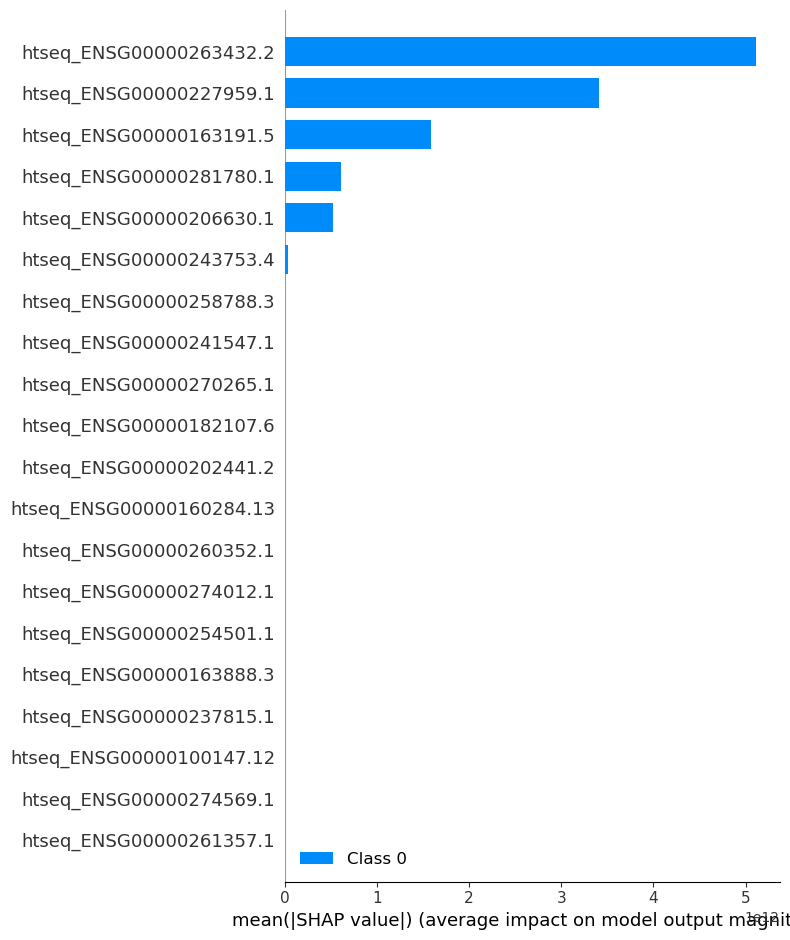

                    col_name  feature_importance_vals
65   htseq_ENSG00000280231.1             1.225241e+13
135  htseq_ENSG00000257696.1             1.109112e-02
52   htseq_ENSG00000279583.1             7.073496e-03
3    htseq_ENSG00000270788.1             5.990127e-03
79   htseq_ENSG00000267274.1             4.157121e-03
..                       ...                      ...
23   htseq_ENSG00000233762.3             2.864180e-03
104  htseq_ENSG00000234664.1             2.863539e-03
108  htseq_ENSG00000265321.1             2.855736e-03
54   htseq_ENSG00000218980.2             2.854333e-03
78   htseq_ENSG00000276325.1             2.841288e-03

[152 rows x 2 columns]
sum shap 12252405573593.621
sum shap 1.000000000000004
[0.9999999999999627, 9.052198736203943e-16, 5.77314837588081e-16, 4.888939611043645e-16, 3.3929019255571814e-16, 3.214860371386423e-16, 3.1635458020302565e-16, 3.0944515035168757e-16, 3.083425586061515e-16, 3.069956323676408e-16, 3.0539611817378035e-16, 3.048315480414093e-

In [41]:
    from keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from keras.callbacks import EarlyStopping

    model = Sequential()
    model.add(Dense(16, input_shape=(X_train.shape[1],), activation='relu')) # Add an input shape! (features,)
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()

    # compile the model
    model.compile(optimizer='Adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    es = EarlyStopping(monitor='val_accuracy',
                                       mode='max',
                                       patience=10,
                                       restore_best_weights=True)
    
    history = model.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=80,
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

    import shap
    # Choose one of the following methods to summarize the background
    # Option 1: shap.sample
    background_summary = shap.sample(X_train, 25)  # Adjust the number of samples (K)
    # Option 2: shap.kmeans
    # background_summary = shap.kmeans(X_train, 100)  # Adjust the number of samples (K)

    explainer = shap.KernelExplainer(model.predict, background_summary)
    shap_values = explainer.shap_values(X_test, nsamples=100)
    
    shap.summary_plot(shap_values,X_test)
    
    annShap = []
    for i in shap_values:
        for j in i:
            annShap.append(np.mean(abs(j)))
    vals = annShap

    feature_names = X_train.columns

    shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                      columns=['col_name','feature_importance_vals'])
    shap_importance.sort_values(by=['feature_importance_vals'],
                                   ascending=False, inplace=True)
    print(shap_importance)
    print('sum shap', sum(shap_importance['feature_importance_vals']))
    
    df = shap_importance['feature_importance_vals']
    
    df_scaled = [float(i)/sum(df) for i in df]
    
    shap_importance.drop('feature_importance_vals',  axis=1)
    shap_importance['feature_importance_vals'] = df_scaled
    
    print('sum shap', sum(shap_importance['feature_importance_vals']))

    # Print the scaled data
    print(df_scaled)
    
    for i in shap_importance['col_name']:
        if i not in overlap:
            overlap[i] = shap_importance.loc[shap_importance.col_name == i, 'feature_importance_vals'].values[0]
        else: 
            overlap[i] = overlap[i] + shap_importance.loc[shap_importance.col_name == i, 'feature_importance_vals'].values[0]
    overlapSort = sorted(overlap.items(), key=lambda x:x[1], reverse=True)

In [42]:
aveFeatVal = pd.DataFrame(overlapSort, columns=['gene', 'val'])
aveFeatVal

gene       val
0     htseq_ENSG00000280231.1  1.147099
1     htseq_ENSG00000215030.5  1.099626
2     htseq_ENSG00000225131.2  1.048975
3     htseq_ENSG00000128228.4  1.046925
4     htseq_ENSG00000244268.1  0.607473
..                        ...       ...
147   htseq_ENSG00000274569.1  0.036758
148   htseq_ENSG00000232439.1  0.036443
149   htseq_ENSG00000168334.8  0.036375
150  htseq_ENSG00000088992.16  0.036279
151   htseq_ENSG00000279487.1  0.035967

[152 rows x 2 columns]

In [43]:
aveFeatVal['val'] = aveFeatVal['val'] / 18
aveFeatVal

gene       val
0     htseq_ENSG00000280231.1  0.063728
1     htseq_ENSG00000215030.5  0.061090
2     htseq_ENSG00000225131.2  0.058276
3     htseq_ENSG00000128228.4  0.058162
4     htseq_ENSG00000244268.1  0.033749
..                        ...       ...
147   htseq_ENSG00000274569.1  0.002042
148   htseq_ENSG00000232439.1  0.002025
149   htseq_ENSG00000168334.8  0.002021
150  htseq_ENSG00000088992.16  0.002016
151   htseq_ENSG00000279487.1  0.001998

[152 rows x 2 columns]

In [19]:
# # from xgboost import XGBClassifier
# # model = XGBClassifier()
# # model.fit(X_train, y_train)
# # test_1 = X_test.iloc[1]

# # import lime 
# # from lime import lime_tabular
# # lime_explainer = lime_tabular.LimeTabularExplainer(
# #     training_data=np.array(X_train),
# #     feature_names=X_train.columns,
# #     class_names=['CESC', 'UCEC'],
# #     mode='classification'
# # )
# # lime_exp = lime_explainer.explain_instance(
# #     data_row=test_1,
# #     predict_fn=model.predict_proba
# # )
# # lime_exp.show_in_notebook(show_table=True)

In [ ]:
# https://www.geeksforgeeks.org/introduction-to-explainable-aixai-using-lime/

In [ ]:
# https://towardsdatascience.com/the-shapley-value-for-ml-models-f1100bff78d1

#  In their original form, Shapley values were used to fairly attribute a player’s contribution to the end result of a game.

In [49]:
# # https://www.kaggle.com/code/wrosinski/shap-feature-importance-with-feature-engineering

[0]	validation_0-logloss:0.40145	validation_1-logloss:0.40172
[1]	validation_0-logloss:0.27261	validation_1-logloss:0.27278
[2]	validation_0-logloss:0.19186	validation_1-logloss:0.19196
[3]	validation_0-logloss:0.13776	validation_1-logloss:0.13784
[4]	validation_0-logloss:0.10024	validation_1-logloss:0.10029
[5]	validation_0-logloss:0.07367	validation_1-logloss:0.07371
[6]	validation_0-logloss:0.05458	validation_1-logloss:0.05461
[7]	validation_0-logloss:0.04075	validation_1-logloss:0.04077


`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[8]	validation_0-logloss:0.03065	validation_1-logloss:0.03066
[9]	validation_0-logloss:0.02324	validation_1-logloss:0.02325
[10]	validation_0-logloss:0.01778	validation_1-logloss:0.01779
[11]	validation_0-logloss:0.01374	validation_1-logloss:0.01374
[12]	validation_0-logloss:0.01073	validation_1-logloss:0.01074
[13]	validation_0-logloss:0.00849	validation_1-logloss:0.00849
[14]	validation_0-logloss:0.00680	validation_1-logloss:0.00681
[15]	validation_0-logloss:0.00553	validation_1-logloss:0.00553
[16]	validation_0-logloss:0.00455	validation_1-logloss:0.00456
[17]	validation_0-logloss:0.00380	validation_1-logloss:0.00381
[18]	validation_0-logloss:0.00322	validation_1-logloss:0.00322
[19]	validation_0-logloss:0.00276	validation_1-logloss:0.00276
[20]	validation_0-logloss:0.00276	validation_1-logloss:0.00276
[21]	validation_0-logloss:0.00276	validation_1-logloss:0.00276
[22]	validation_0-logloss:0.00276	validation_1-logloss:0.00276
[23]	validation_0-logloss:0.00276	validation_1-logloss:0.

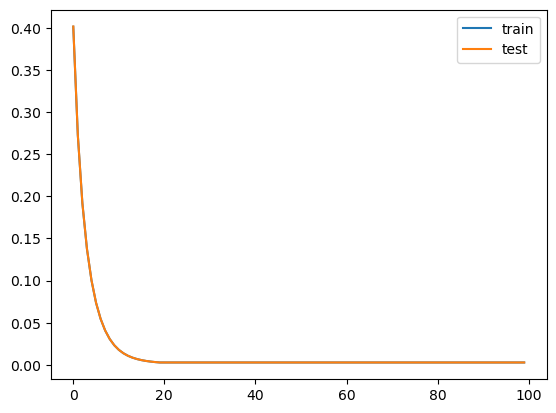

In [172]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot

model = XGBClassifier()

# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]

# fit the model
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)

# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)

# retrieve performance metrics
results = model.evals_result()

# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [50]:
# clf = LogisticRegression(random_state=0).fit(X_train, y_train)
# clf.predict(X_test[:2, :])

# clf.predict_proba(X[:2, :])

# clf.score(X, y)

# y_probs = cls.predict_proba(X_)
# qry_loss_t = metrics.log_loss(y, y_probs)

In [170]:
# from sklearn.metrics import log_loss

# logloss = log_loss(y_test, model.predict_proba(X_test))
# logloss

In [ ]:
# https://pykeen.readthedocs.io/en/stable/tutorial/running_ablation.html

In [169]:
# https://www.samueltaylor.org/articles/feature-importance-for-any-model.html
# ablation study

# from sklearn.datasets import load_digits
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split
# import sklearn.metrics as mx

# def score_model(X_train, X_test, y_train, y_test):
#     clf = SVC(gamma='scale', kernel='rbf')
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     return accuracy_score(y_test, y_pred)

# base_score = score_model(X_train, X_test, y_train, y_test)

# scores = []

# for i in range(X_train.shape[1]):
#     use_column = [ndx != i for ndx in range(X_train.shape[1])]
#     scores.append(score_model(X_train[:, use_column],
#                               X_test[:, use_column],
#                               y_train,
#                               y_test))
    
# sorted(enumerate([base_score - s for s in scores]),
#        key=lambda ndx_score: ndx_score[1],
#        reverse=True)[:10]

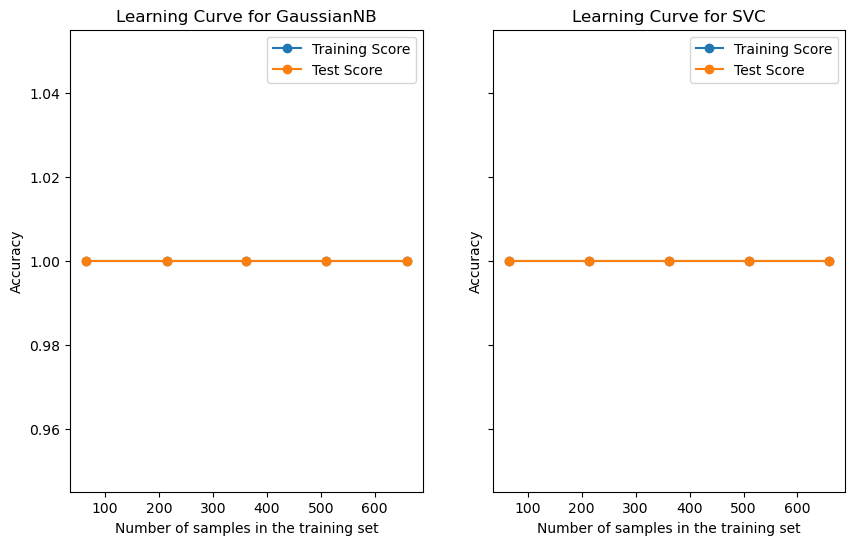

In [84]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

X, y = newAll, newAllLabel

naive_bayes = GaussianNB()
svc = SVC(kernel="rbf", gamma=0.001)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([naive_bayes, svc]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

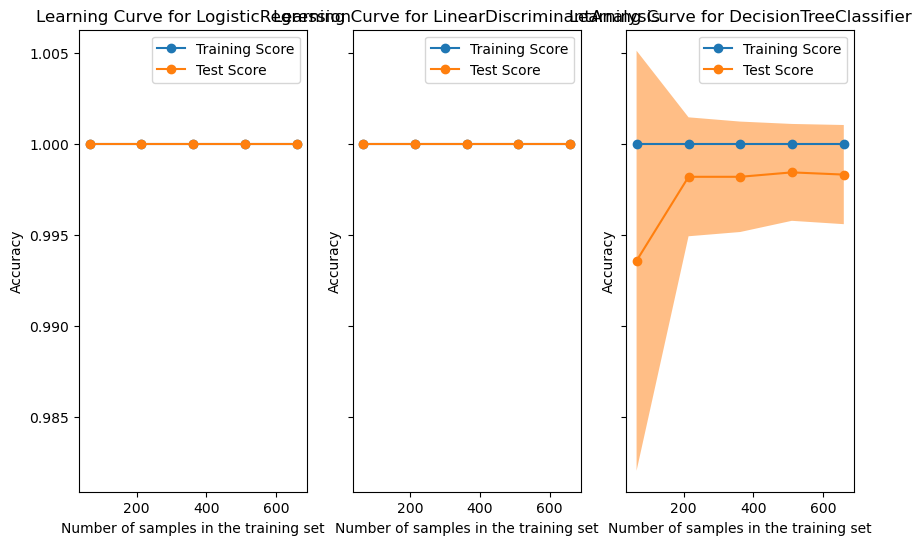

In [86]:
X, y =  newAll, newAllLabel


logit = LogisticRegression(solver='liblinear', multi_class='ovr', random_state = 0)
lda = LinearDiscriminantAnalysis()
dt = DecisionTreeClassifier(random_state = 0)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 6), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([logit, lda, dt]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:3], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

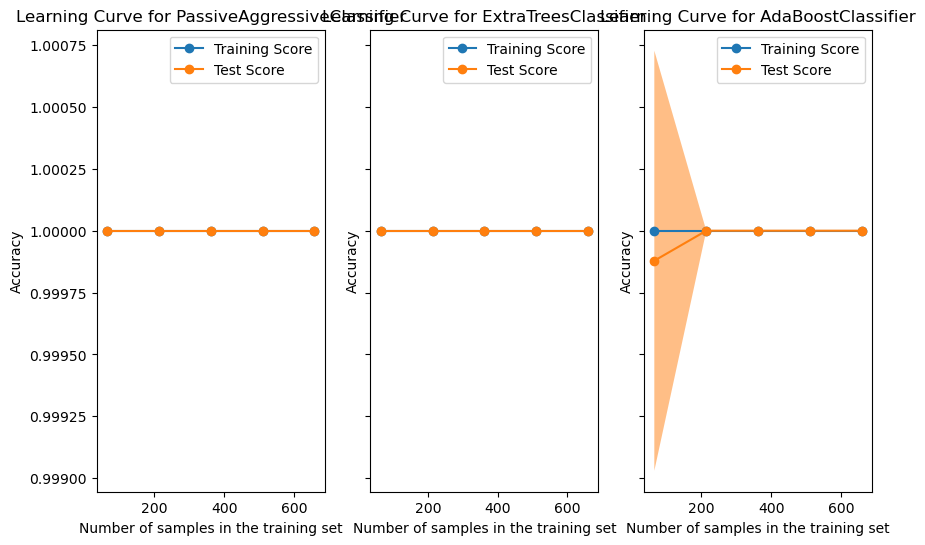

In [88]:
AdaBoostClassifier(n_estimators=100, random_state=0)
models.append(('XTC', ExtraTreesClassifier(random_state = 0)))
models.append(('PAC', ))

X, y =  newAll, newAllLabel


pac = PassiveAggressiveClassifier(random_state=0)
xtree = ExtraTreesClassifier(random_state = 0)
ada = AdaBoostClassifier(n_estimators=100, random_state=0)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 6), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([pac, xtree, ada]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:3], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

[0]	validation_0-auc:1.00000	validation_1-auc:1.00000


`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[1]	validation_0-auc:1.00000	validation_1-auc:1.00000
[2]	validation_0-auc:1.00000	validation_1-auc:1.00000
[3]	validation_0-auc:1.00000	validation_1-auc:1.00000
[4]	validation_0-auc:1.00000	validation_1-auc:1.00000
[5]	validation_0-auc:1.00000	validation_1-auc:1.00000
[6]	validation_0-auc:1.00000	validation_1-auc:1.00000
[7]	validation_0-auc:1.00000	validation_1-auc:1.00000
[8]	validation_0-auc:1.00000	validation_1-auc:1.00000
[9]	validation_0-auc:1.00000	validation_1-auc:1.00000
[10]	validation_0-auc:1.00000	validation_1-auc:1.00000
[11]	validation_0-auc:1.00000	validation_1-auc:1.00000
[12]	validation_0-auc:1.00000	validation_1-auc:1.00000
[13]	validation_0-auc:1.00000	validation_1-auc:1.00000
[14]	validation_0-auc:1.00000	validation_1-auc:1.00000
[15]	validation_0-auc:1.00000	validation_1-auc:1.00000
[16]	validation_0-auc:1.00000	validation_1-auc:1.00000
[17]	validation_0-auc:1.00000	validation_1-auc:1.00000
[18]	validation_0-auc:1.00000	validation_1-auc:1.00000
[19]	validation_0-a

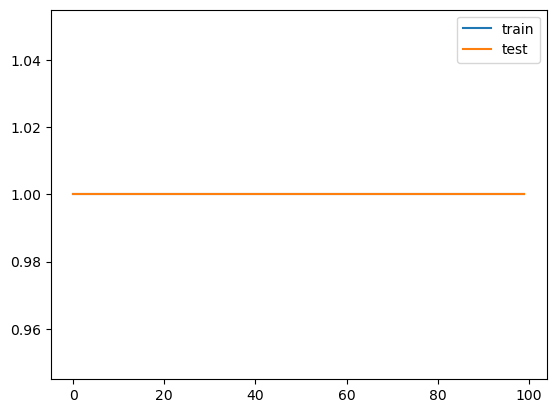

In [44]:
# plot learning curve of an xgboost model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot

model = XGBClassifier()
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
model.fit(X_train, y_train, eval_metric='auc', eval_set=evalset)
# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['auc'], label='train')
pyplot.plot(results['validation_1']['auc'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()